# Coupon-Acceptance-on-E-commerce-Platforms

The task is to predict whether the customers while driving would accept coupons or not amidst various driving conditions and various coupon types offered .
The problem has a target labelled whether the customer accepts coupon or not  , hence the problem falls under supervised machine learning and specifically a classification problem



In [1]:
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [2]:
data =  pd.read_csv('Ds_Data.csv')
df=  pd.DataFrame(data)
df.head(10)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,Restaurant(<20),2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,Carry out & Take away,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,Restaurant(<20),2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,Bar,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [4]:
df.shape

(12684, 25)

In [5]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
null_val = df.isnull().sum()
null_val

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [7]:
#number of missing data in percent

per_null_val = (null_val/len(df))*100
per_null_val

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

In [8]:
#drop car 
df_missing_val = data.drop(['car'],axis=1)

df_missing_val.head(10)


,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,Restaurant(<20),2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,Carry out & Take away,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,Restaurant(<20),2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,Bar,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [9]:
#other missing values in dataset with percent
#Bar                      0.843582
#CoffeeHouse              1.710817
#CarryAway                1.190476
#RestaurantLessThan20     1.024913
#Restaurant20To50         1.490066

In [10]:
#bar
df_missing_val['Bar'].describe()

count     12577
unique        5
top       never
freq       5197
Name: Bar, dtype: object

In [11]:
df_missing_val['Bar'].value_counts()


Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [12]:
df_missing_val['Bar'] = df_missing_val['Bar'].fillna('never')
df_missing_val['Bar'].head()


0    never
1    never
2    never
3    never
4    never
Name: Bar, dtype: object

In [13]:
#coffeehouse
df_missing_val['CoffeeHouse'].describe()

count     12467
unique        5
top       less1
freq       3385
Name: CoffeeHouse, dtype: object

In [14]:
df_missing_val['CoffeeHouse'].isnull().sum()

np.int64(217)

In [15]:
df_missing_val['CoffeeHouse'] = df_missing_val['CoffeeHouse'].fillna('less1')

In [16]:
df_missing_val['CoffeeHouse'].isnull().sum()

np.int64(0)

In [17]:
#carryaway
df_missing_val['CarryAway'].describe()

count     12533
unique        5
top         1~3
freq       4672
Name: CarryAway, dtype: object

In [18]:
df_missing_val['CarryAway'].isnull().sum()

np.int64(151)

In [19]:
df_missing_val['CarryAway'] = df_missing_val['CarryAway'].fillna('1~3')
df_missing_val['CarryAway'].isnull().sum()

np.int64(0)

In [20]:
#RestaurantLessThan20
df_missing_val['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [21]:
df_missing_val['RestaurantLessThan20'].isnull().sum()

np.int64(130)

In [22]:
df_missing_val['RestaurantLessThan20'] = df_missing_val['RestaurantLessThan20'].fillna('1~3')
df_missing_val['RestaurantLessThan20'].isnull().sum()

np.int64(0)

In [23]:
#Restaurant20To50
df_missing_val['Restaurant20To50'].value_counts()


Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [24]:
df_missing_val['Restaurant20To50'].isnull().sum()

np.int64(189)

In [25]:
df_missing_val['Restaurant20To50'] = df_missing_val['Restaurant20To50'].fillna('less1')
df_missing_val['Restaurant20To50'].isnull().sum()

np.int64(0)

In [26]:
df_nonull = df_missing_val

df_nonull.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

In [27]:
print(len(df_nonull[(df_nonull['destination'] == 'No Urgent Place') & (df_nonull['Accept(Y/N?)'] == 1)]))

3982


In [28]:
print(len(df_nonull[(df_nonull['destination'] == 'Home') & (df_nonull['Accept(Y/N?)'] == 1)]))

1639


In [29]:
print(len(df_nonull[(df_nonull['destination'] == 'Work') & (df_nonull['Accept(Y/N?)'] == 1)]))

1589


destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


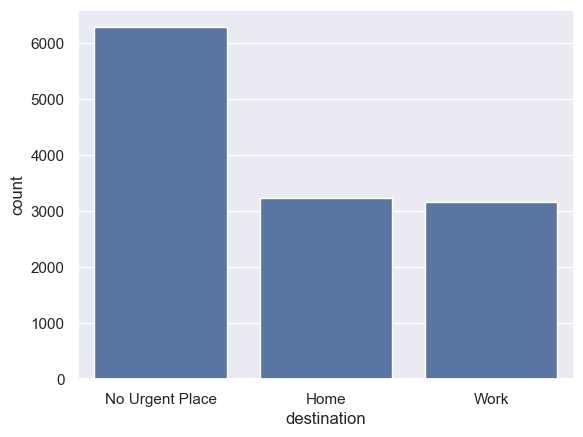

In [30]:
#destination  varience
print(df_nonull['destination'].value_counts())
sns.countplot(x = 'destination' , data = df_nonull)
plt.show()

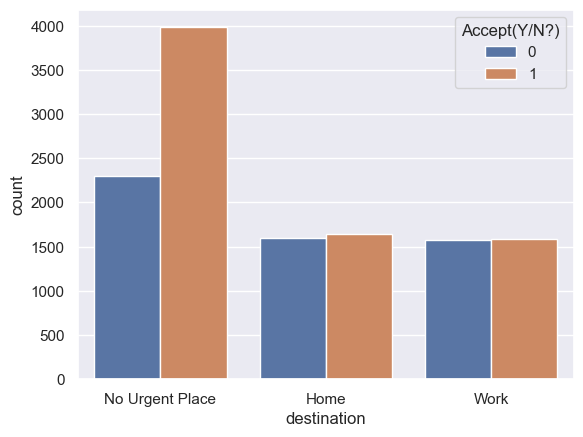

In [31]:
#acceptance of coupon 
sns.countplot(x = 'destination' , hue = 'Accept(Y/N?)' , data = df_nonull)
plt.show()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


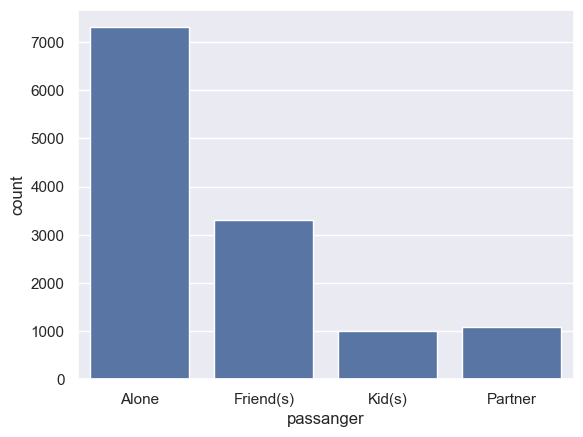

In [32]:
#passanger travel
print(df_nonull['passanger'].value_counts())
sns.countplot(x = 'passanger' , data = df_nonull)
plt.show()

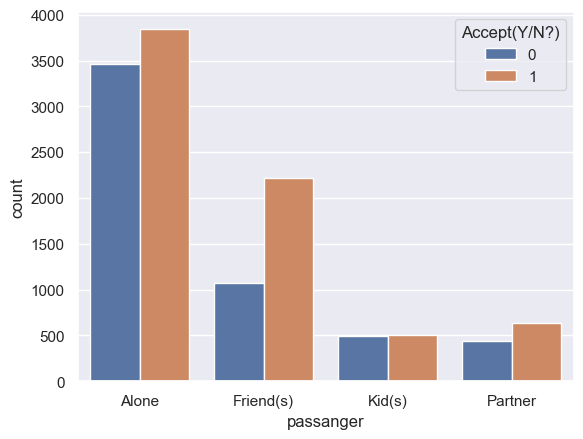

In [33]:
#most people travel alone
sns.countplot(x = 'passanger' , hue = 'Accept(Y/N?)' , data = df_nonull)
plt.show()

In [34]:
for i in df_nonull.select_dtypes(include = ['object']).columns:
    sns.boxplot

PLOTING GRAPH OF ALL COLUMNS

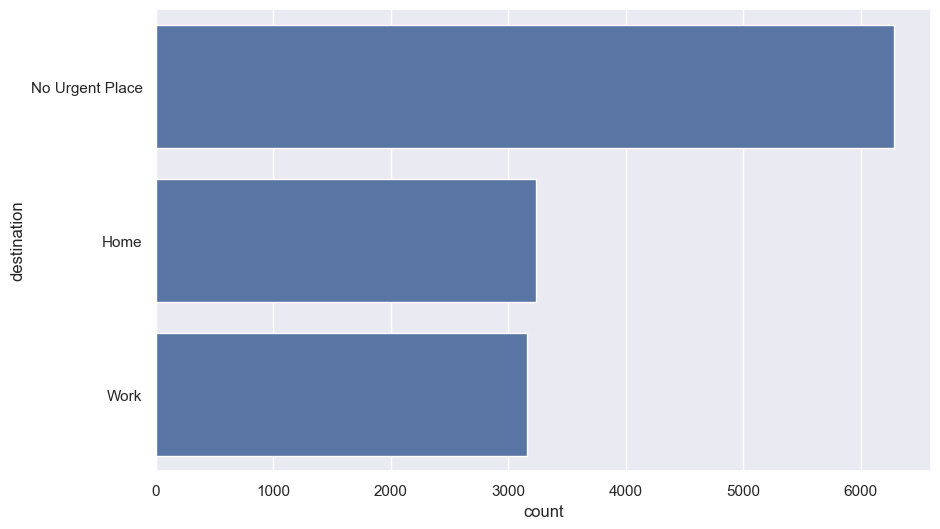

In [35]:

plt.figure(figsize=(10, 6))
sns.countplot(y='destination', data=data, order=data['destination'].value_counts().index)

plt.show()

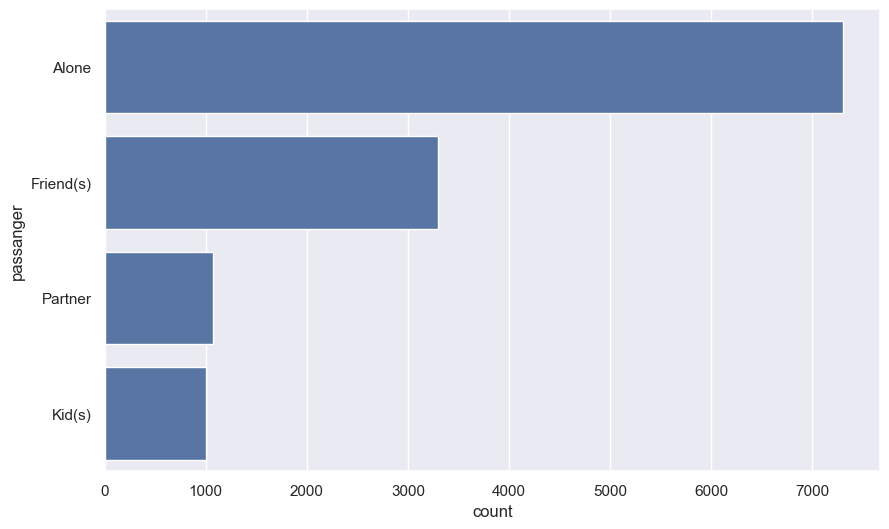

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(y='passanger', data=data, order=data['passanger'].value_counts().index)

plt.show()

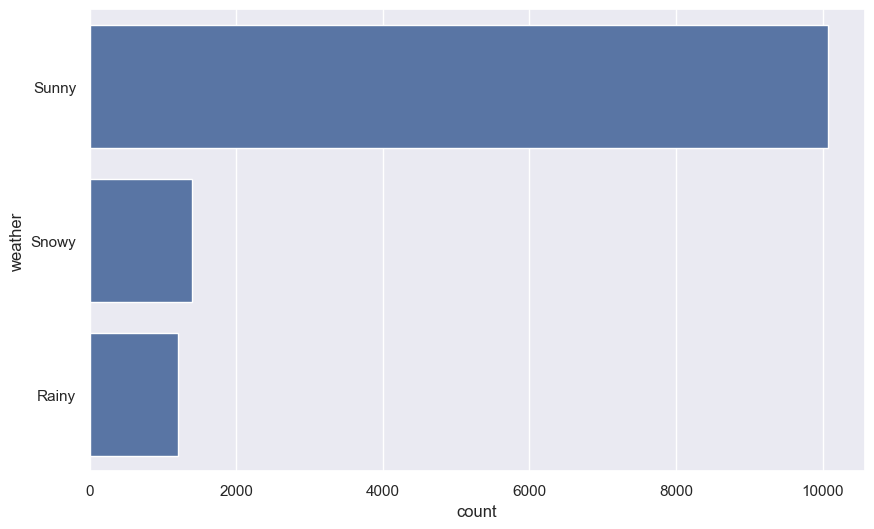

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(y='weather', data=data, order=data['weather'].value_counts().index)

plt.show()

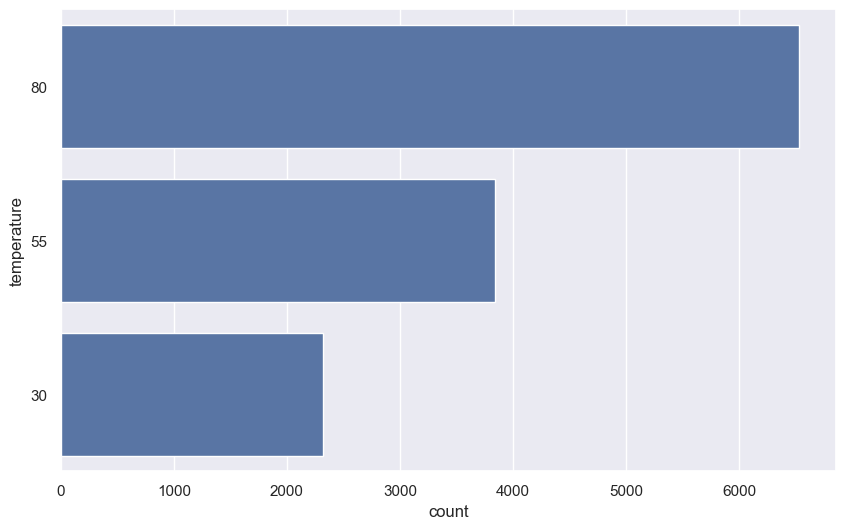

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(y='temperature', data=data, order=data['temperature'].value_counts().index)

plt.show()

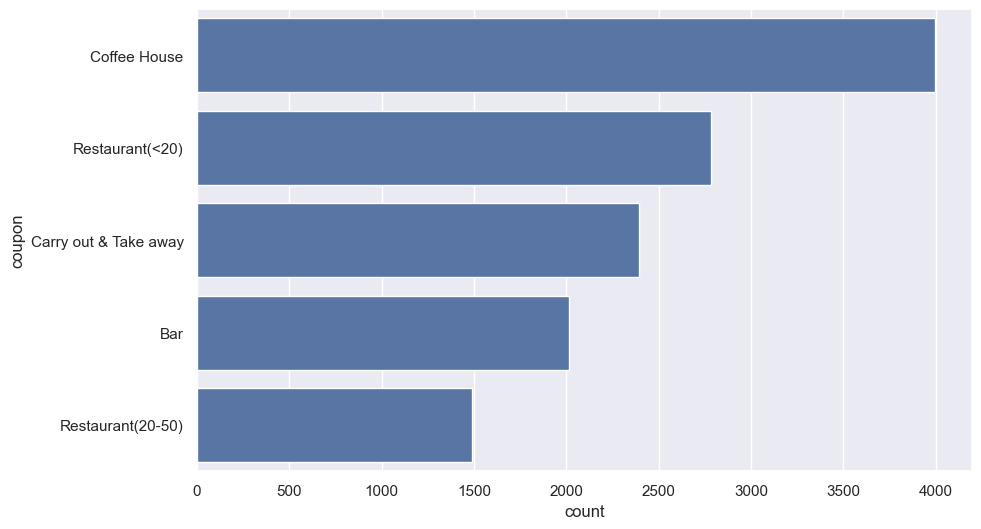

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(y='coupon', data=data, order=data['coupon'].value_counts().index)

plt.show()

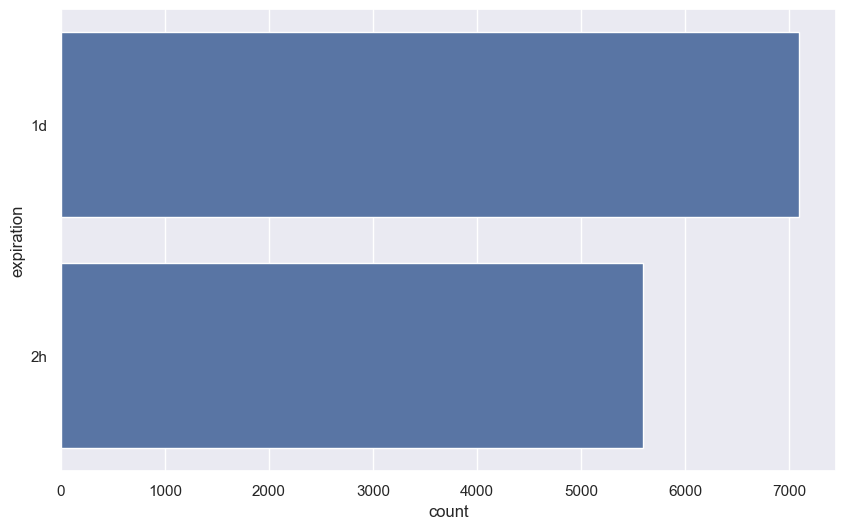

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(y='expiration', data=data, order=data['expiration'].value_counts().index)

plt.show()

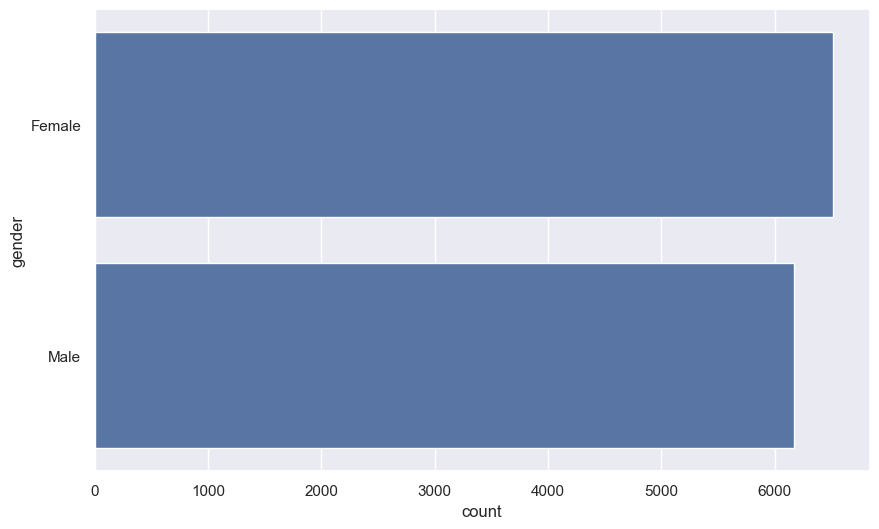

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(y='gender', data=data, order=data['gender'].value_counts().index)

plt.show()

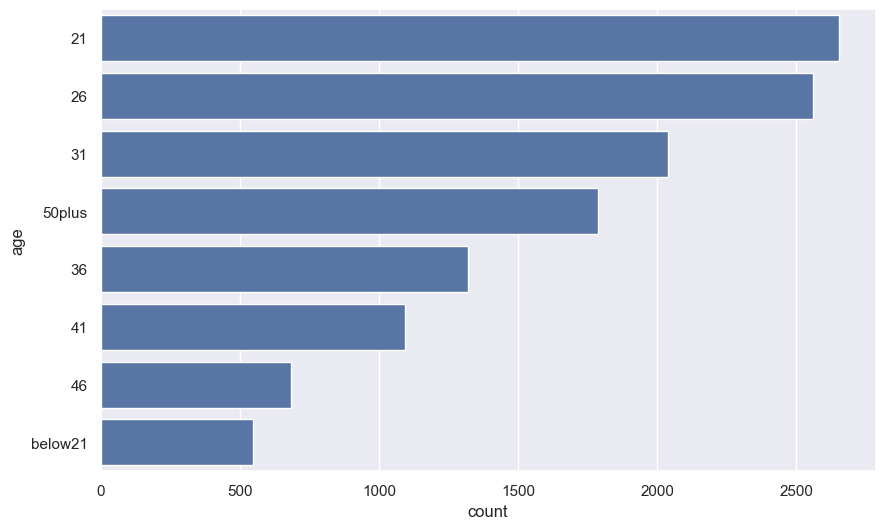

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(y='age', data=data, order=data['age'].value_counts().index)

plt.show()

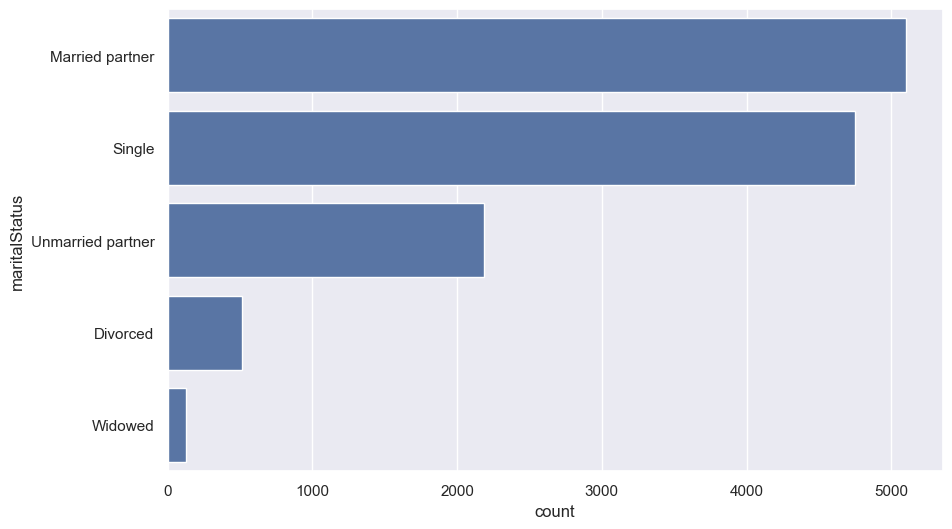

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(y='maritalStatus', data=data, order=data['maritalStatus'].value_counts().index)

plt.show()

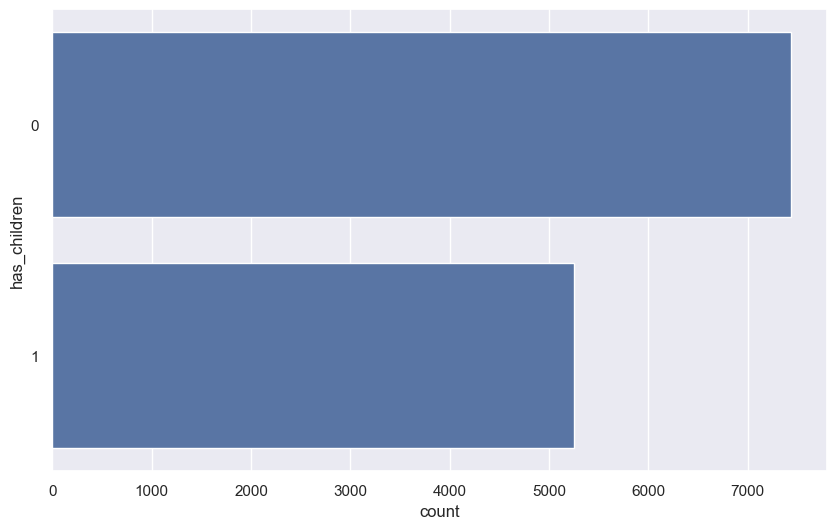

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(y='has_children', data=data, order=data['has_children'].value_counts().index)

plt.show()

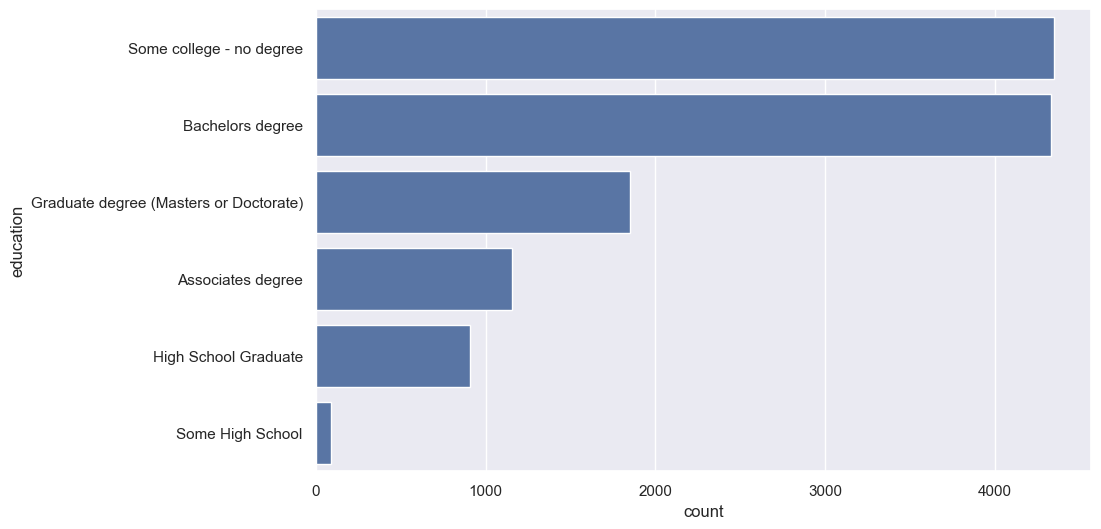

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(y='education', data=data, order=data['education'].value_counts().index)

plt.show()

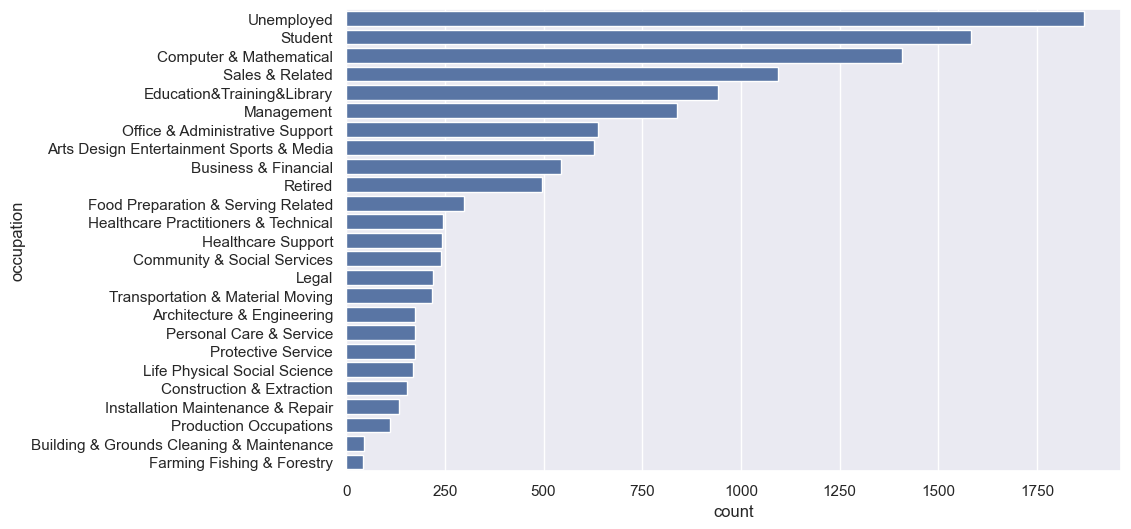

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(y='occupation', data=data, order=data['occupation'].value_counts().index)

plt.show()

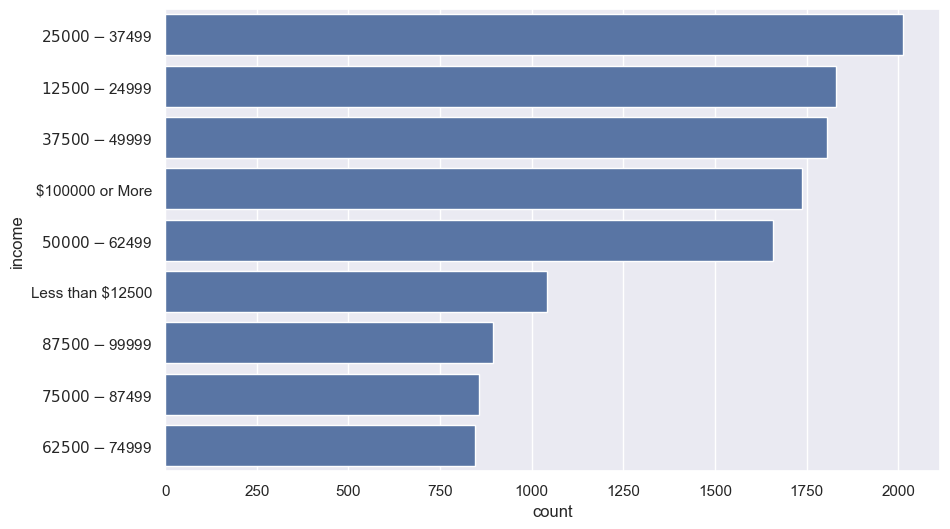

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(y='income', data=data, order=data['income'].value_counts().index)

plt.show()

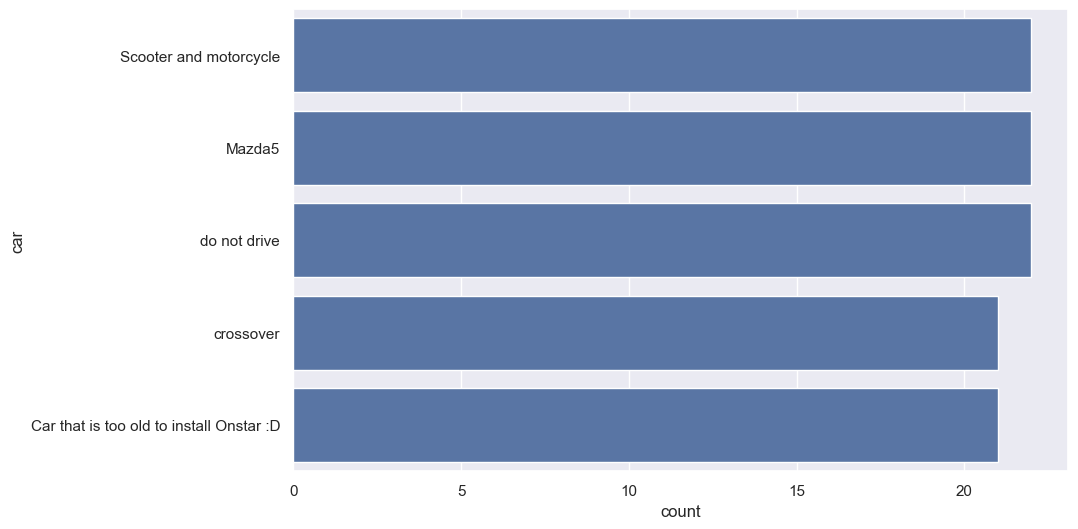

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(y='car', data=data, order=data['car'].value_counts().index)

plt.show()

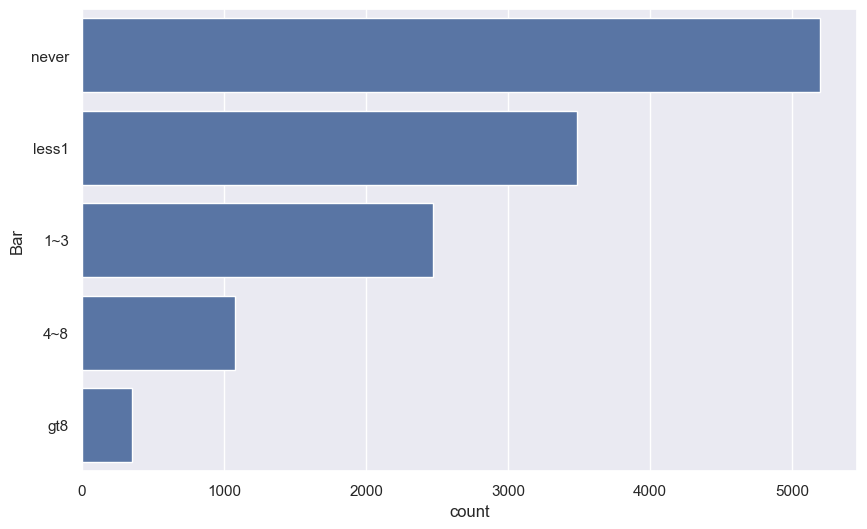

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Bar', data=data, order=data['Bar'].value_counts().index)

plt.show()

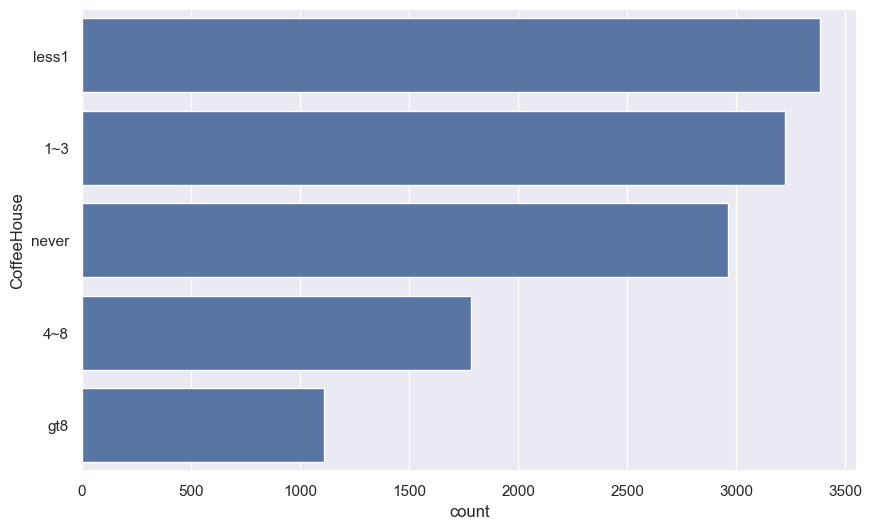

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(y='CoffeeHouse', data=data, order=data['CoffeeHouse'].value_counts().index)

plt.show()

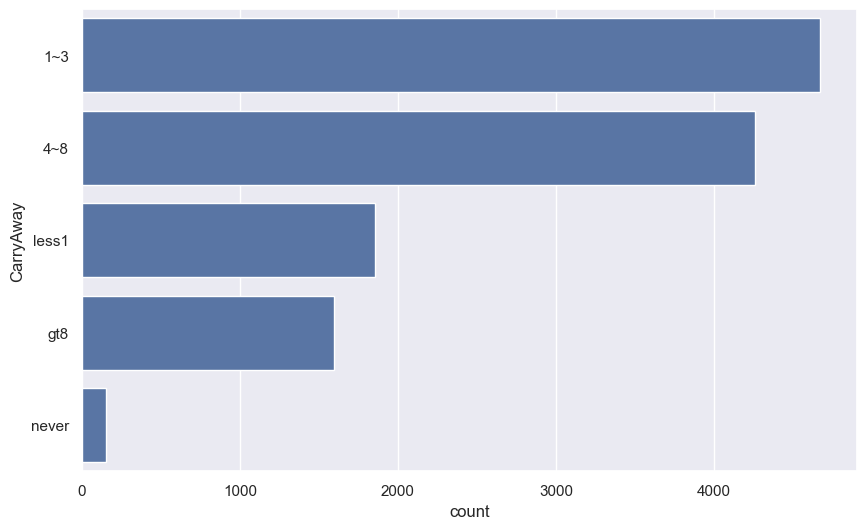

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(y='CarryAway', data=data, order=data['CarryAway'].value_counts().index)

plt.show()

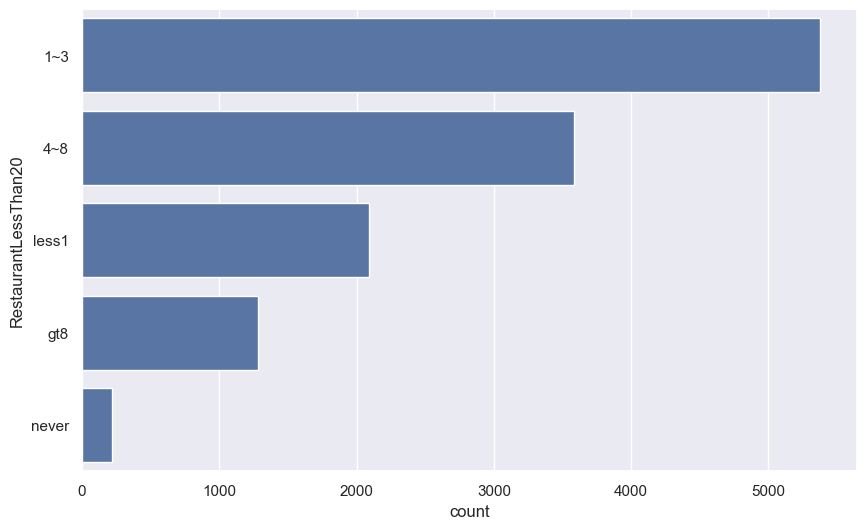

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(y='RestaurantLessThan20', data=data, order=data['RestaurantLessThan20'].value_counts().index)

plt.show()

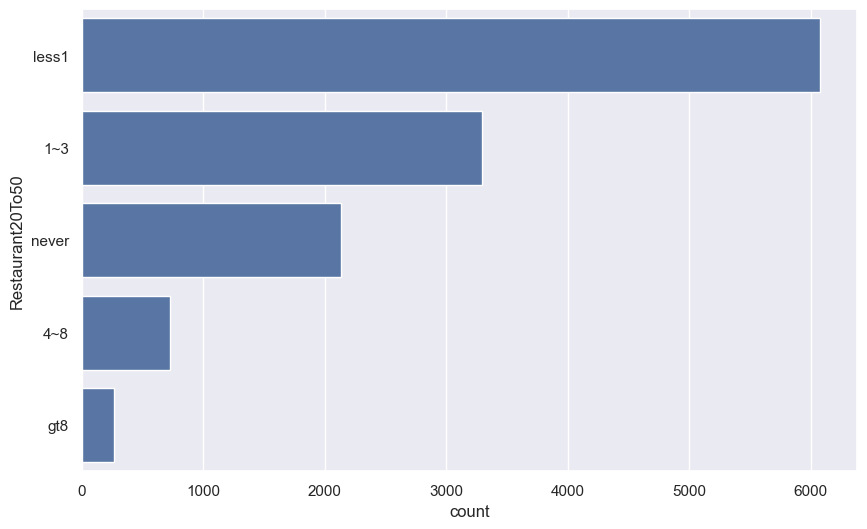

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Restaurant20To50', data=data, order=data['Restaurant20To50'].value_counts().index)

plt.show()

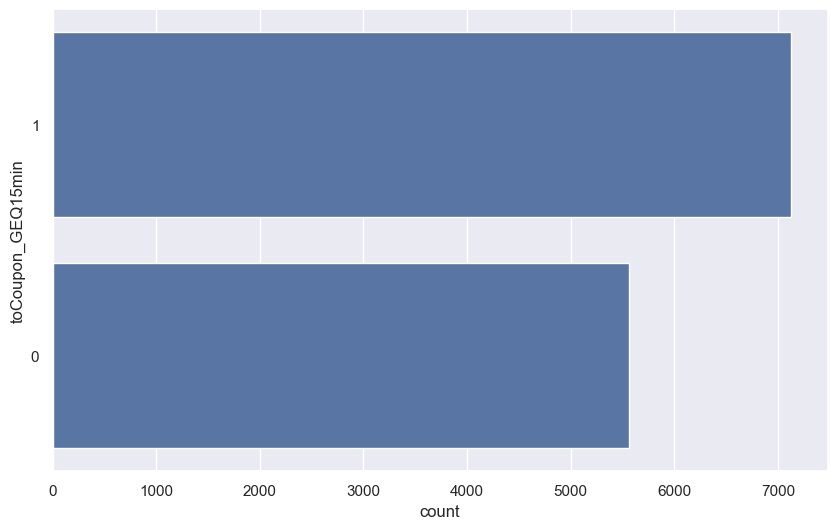

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(y='toCoupon_GEQ15min', data=data, order=data['toCoupon_GEQ15min'].value_counts().index)

plt.show()

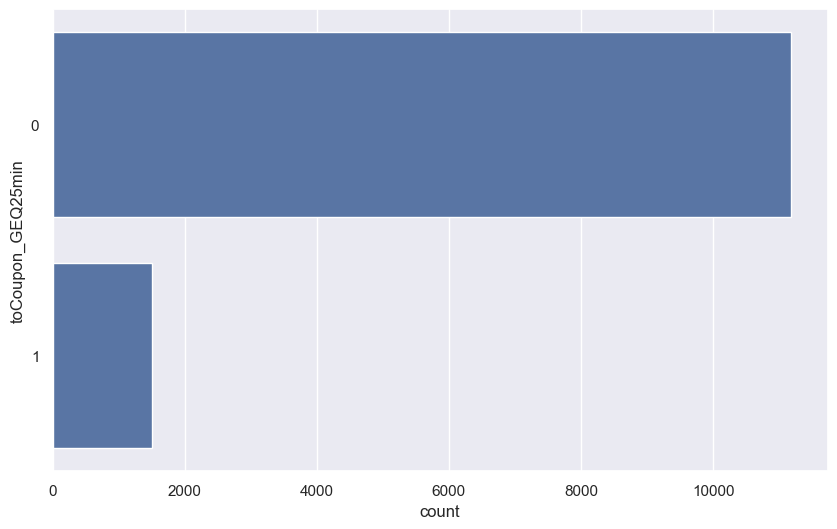

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(y='toCoupon_GEQ25min', data=data, order=data['toCoupon_GEQ25min'].value_counts().index)

plt.show()

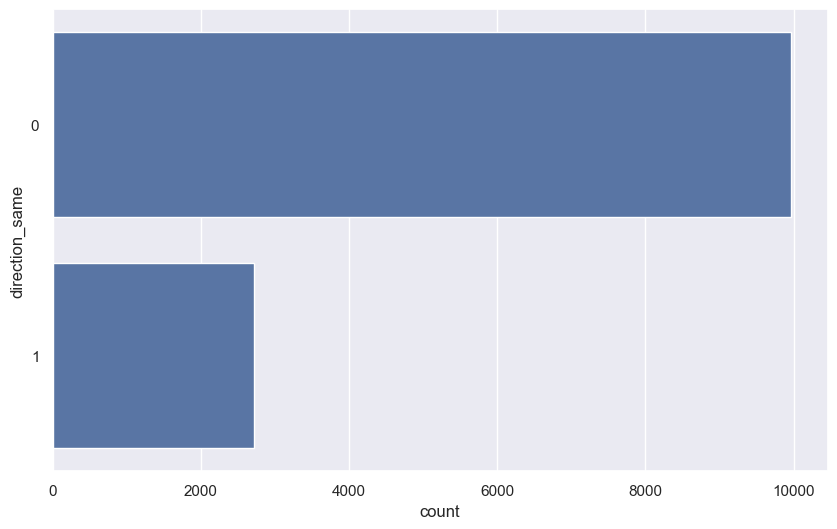

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(y='direction_same', data=data, order=data['direction_same'].value_counts().index)

plt.show()

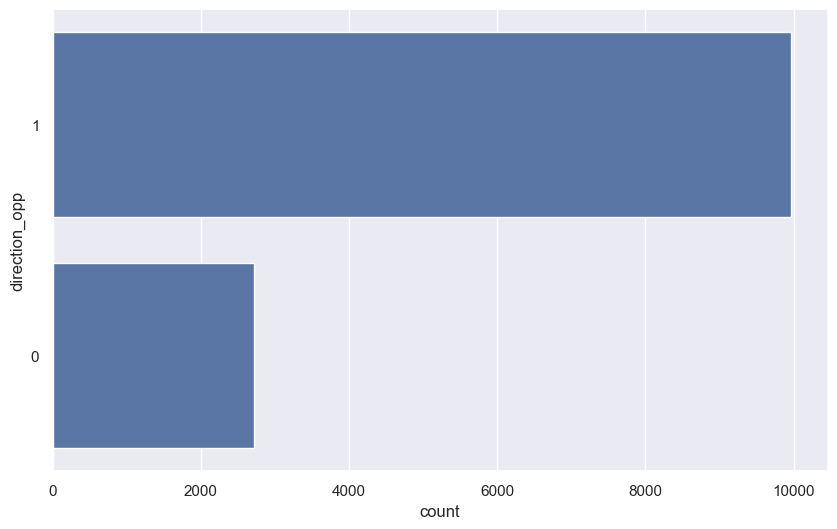

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(y='direction_opp', data=data, order=data['direction_opp'].value_counts().index)

plt.show()

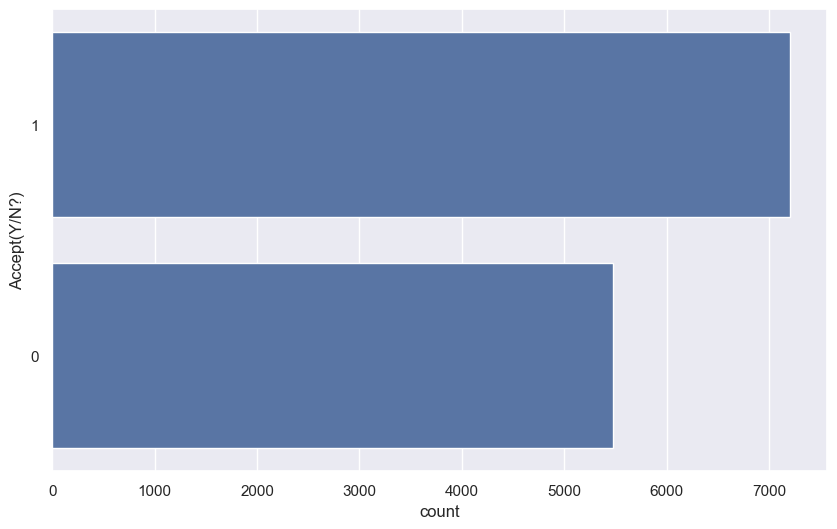

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Accept(Y/N?)', data=data, order=data['Accept(Y/N?)'].value_counts().index)

plt.show()

                 Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
destination                                                              
Home                     3237      1639      1598   50.633302   49.366698
No Urgent Place          6283      3982      2301   63.377367   36.622633
Work                     3164      1589      1575   50.221239   49.778761


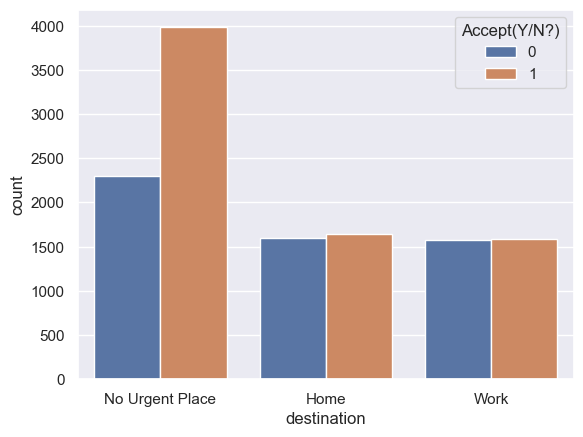

In [59]:
# Trying to understand coupon acceptance pattern for various attributes
a = pd.DataFrame(df_nonull.groupby('destination')['Accept(Y/N?)'].count())
a['accepted'] = df_nonull[df_nonull['Accept(Y/N?)'] == 1].groupby('destination')['Accept(Y/N?)'].count()
a['rejected'] = df_nonull[df_nonull['Accept(Y/N?)'] == 0].groupby('destination')['Accept(Y/N?)'].count()
a['% Accepted'] = ((a['accepted']) / (a['Accept(Y/N?)']))*100
a['% Rejected'] = ((a['rejected']) / (a['Accept(Y/N?)']))*100
print(a)

sns.countplot(x = 'destination' , hue = 'Accept(Y/N?)' , data = df_nonull)
plt.show() 

We can observe that there is a high acceptance rate from people who have no urgent place to go with 63% 

People who are either on the way to home or Work have almost similar acceptance and rejection rates

In [60]:
def grouping(col):
    a = pd.DataFrame(df_nonull.groupby('destination')['Accept(Y/N?)'].count())
    a['accepted'] = df_nonull[df_nonull['Accept(Y/N?)'] == 1].groupby('destination')['Accept(Y/N?)'].count()
    a['rejected'] = df_nonull[df_nonull['Accept(Y/N?)'] == 0].groupby('destination')['Accept(Y/N?)'].count()
    a['% Accepted'] = ((a['accepted']) / (a['Accept(Y/N?)']))*100
    a['% Rejected'] = ((a['rejected']) / (a['Accept(Y/N?)']))*100 
    return a 
    

In [61]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

NOW WE SEE HOW PEOPLE ACCEPT OR REJECT COUPON DUE TO DIFFRENT PARAMETERS

In [62]:
grouping('passanger')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


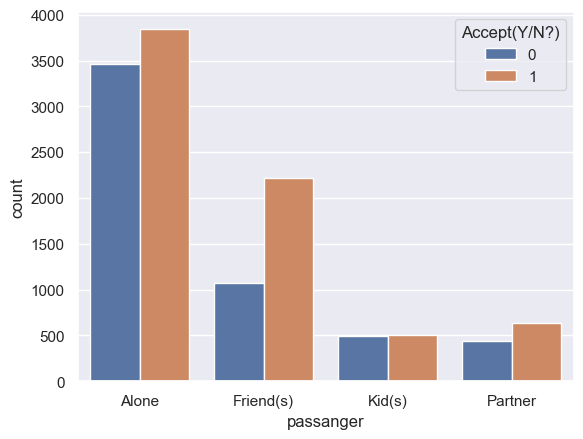

In [63]:
sns.countplot(x = 'passanger' , hue = 'Accept(Y/N?)' , data = df_nonull)
plt.show()

In [64]:
grouping('weather')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


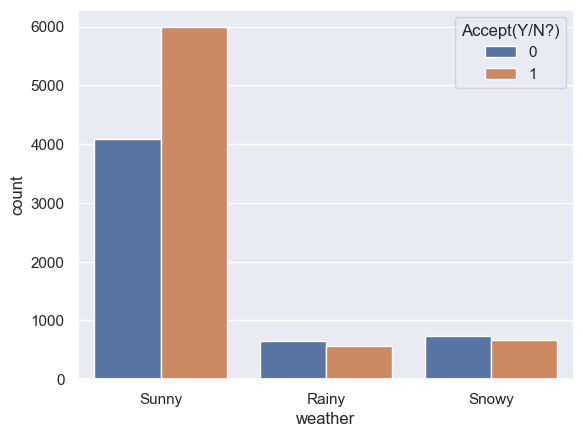

In [65]:
sns.countplot(x = 'weather' , hue = 'Accept(Y/N?)' , data = df_nonull)
plt.show()

Most customers are travelling in a sunny day and coupon accepting chances are also high when compared
to other weather conditions 

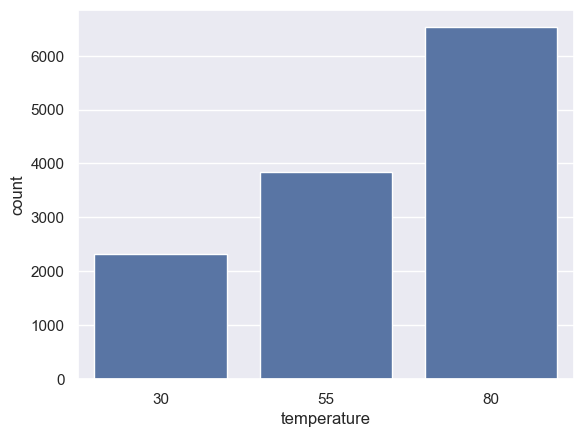

In [66]:
sns.countplot(x = 'temperature' , data = df_nonull)
plt.show()

Temperature is given in Farenheit and 80 F is a normal not so hot temperature where as 55 F is cold weather and 30 F is extreme cold

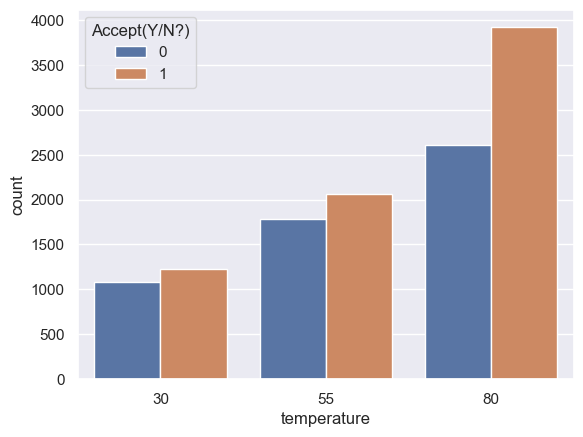

In [67]:
sns.countplot(x = 'temperature' , data = df_nonull , hue = 'Accept(Y/N?)' )
plt.show()

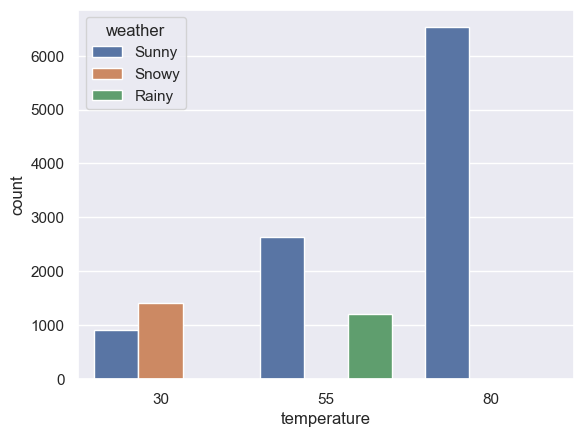

In [68]:
sns.countplot(x = 'temperature' , data = df_nonull , hue = 'weather')
plt.show()

In [69]:
grouping('temperature')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


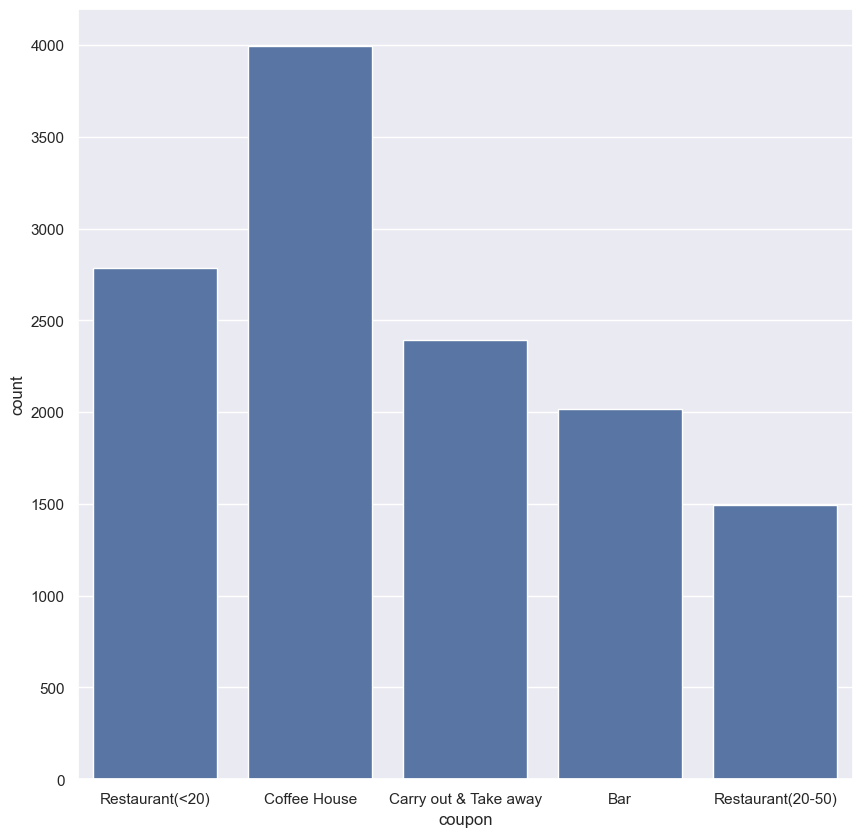

In [70]:
print(data['coupon'].value_counts())
plt.figure(figsize = (10,10))
sns.countplot(x = 'coupon' , data = df_nonull)
plt.show()

In [71]:
grouping('coupon')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


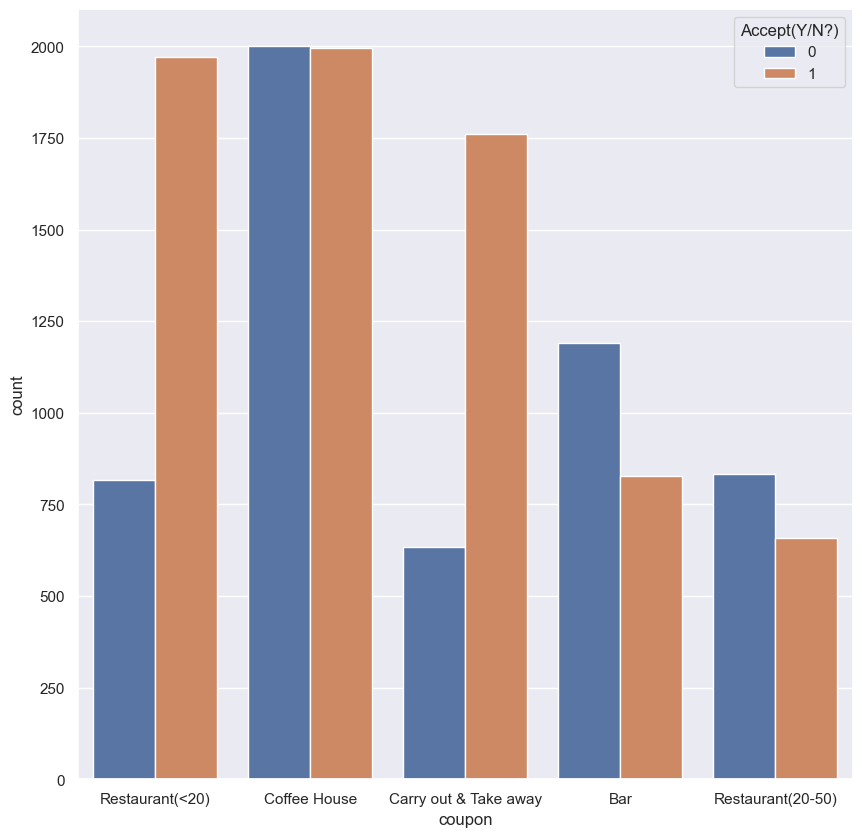

In [72]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'coupon' , data = df_nonull , hue = 'Accept(Y/N?)')
plt.show()

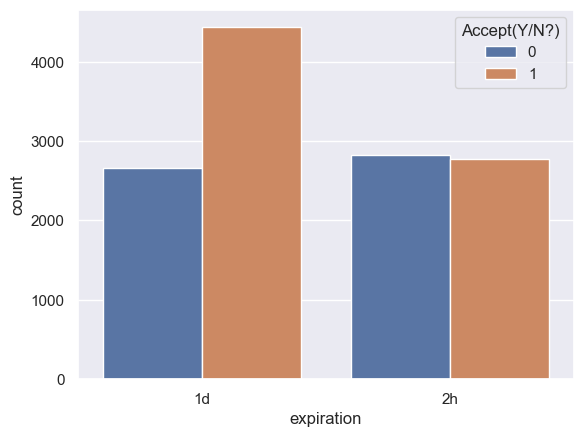

In [73]:
sns.countplot(x = 'expiration' , data = df_nonull , hue = 'Accept(Y/N?)')
plt.show()

In [74]:
grouping('expiration')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


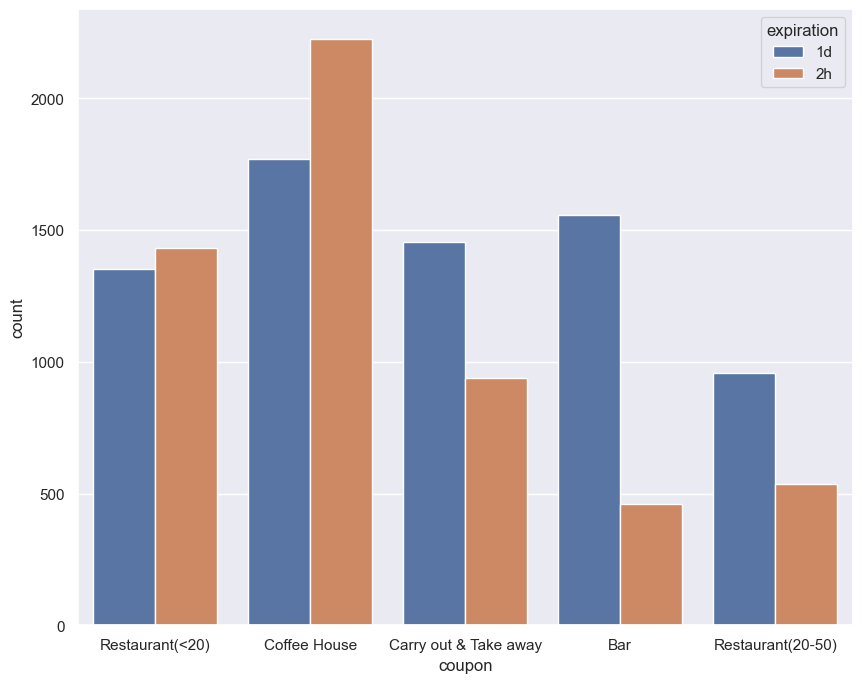

In [75]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'coupon' , data = df_nonull , hue = 'expiration')
plt.show()

In [76]:
pd.DataFrame(df_nonull.groupby('coupon')['expiration'].value_counts())

count
coupon                expiration       
Bar                   1d           1556
                      2h            461
Carry out & Take away 1d           1456
                      2h            937
Coffee House          2h           2227
                      1d           1769
Restaurant(20-50)     1d            956
                      2h            536
Restaurant(<20)       2h           1432
                      1d           1354

gender
Female    6511
Male      6173
Name: count, dtype: int64


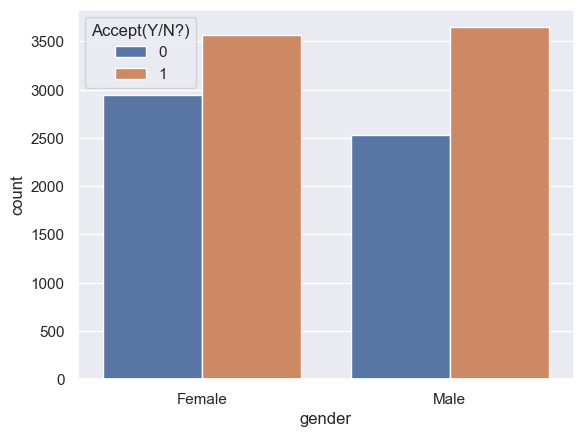

In [77]:

print(data['gender'].value_counts())
sns.countplot( x = 'gender' , data = df_nonull , hue = 'Accept(Y/N?)')
plt.show()

In [78]:
grouping('gender')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


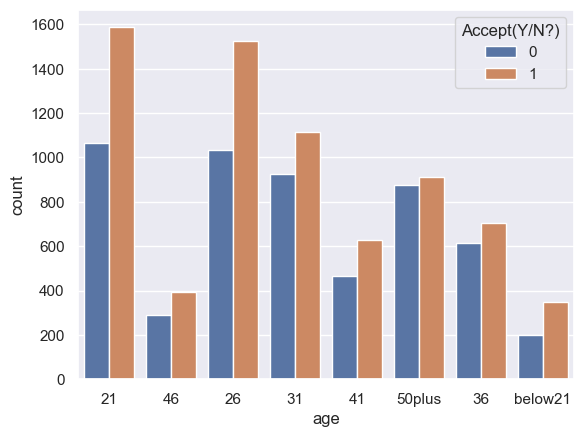

In [79]:
print(data['age'].value_counts())
sns.countplot( x = 'age' , data = df_nonull , hue = 'Accept(Y/N?)')
plt.show()

In [80]:
grouping('age')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


C:\Users\harsh\AppData\Local\Temp\ipykernel_15472\3086118155.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x = 'age' , y ='Accept(Y/N?)', hue ='coupon', data = df_nonull , ci = None)


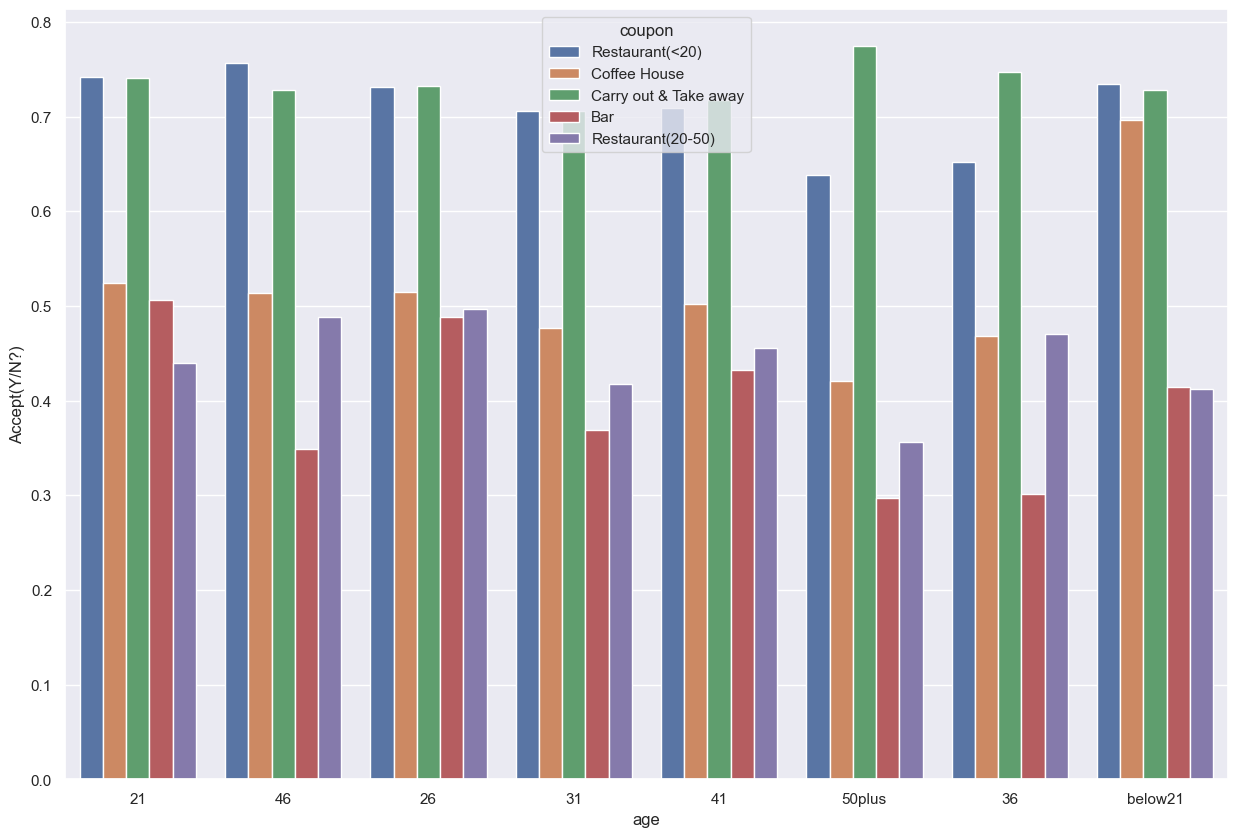

In [81]:
plt.figure(figsize = (15 , 10))
sns.barplot( x = 'age' , y ='Accept(Y/N?)', hue ='coupon', data = df_nonull , ci = None)
plt.show()

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64


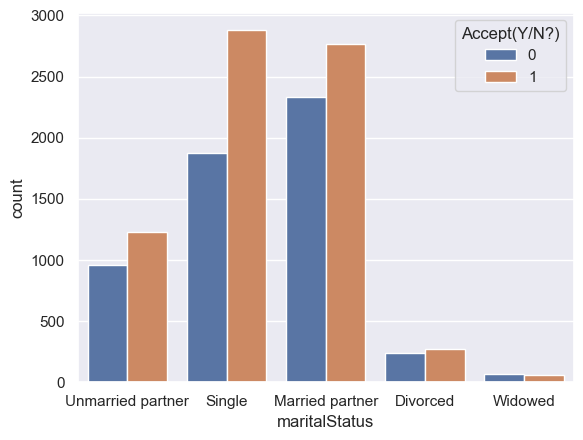

In [82]:
print(df_nonull['maritalStatus'].value_counts())
sns.countplot( x = 'maritalStatus' , data = df_nonull , hue = 'Accept(Y/N?)')
plt.show()

In [83]:
grouping('maritalStatus')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


C:\Users\harsh\AppData\Local\Temp\ipykernel_15472\3930942062.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x = 'maritalStatus' , y ='Accept(Y/N?)', hue ='passanger', data = df_nonull , ci= None)


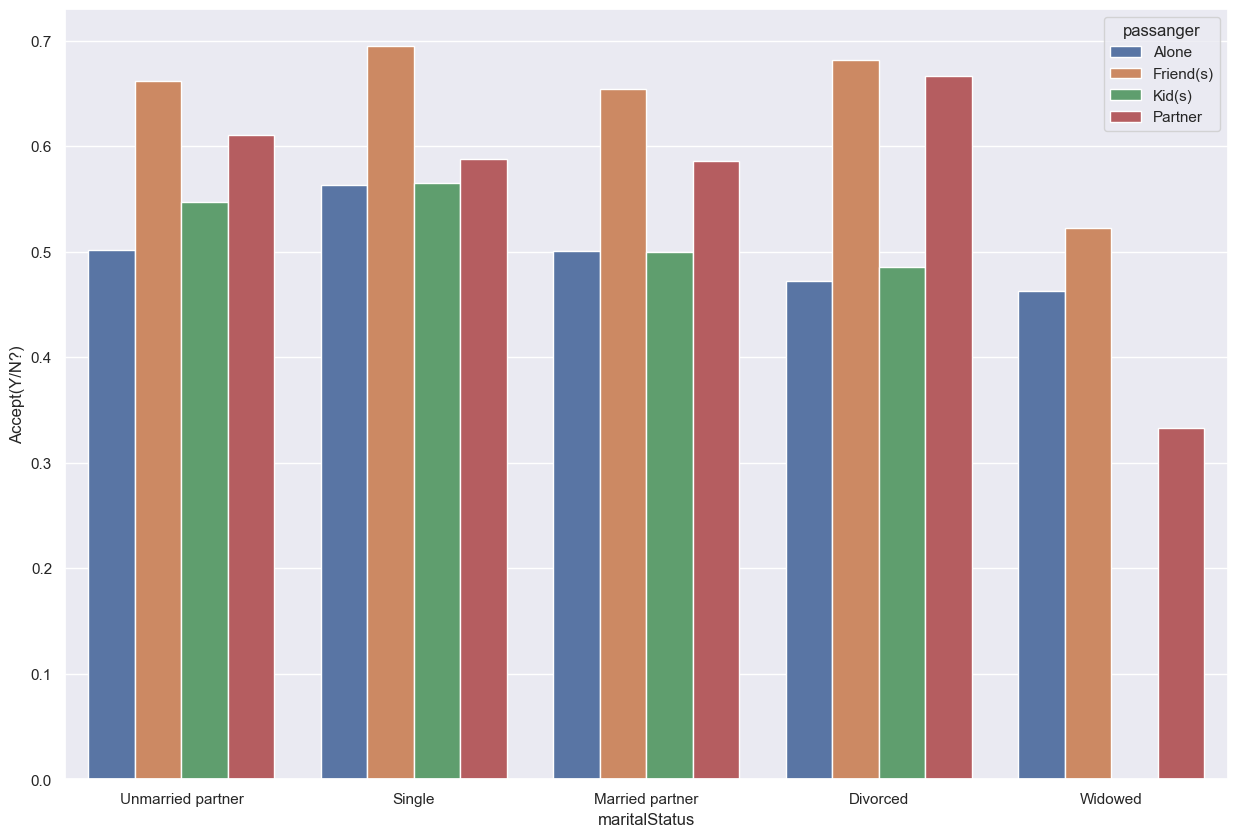

In [84]:
plt.figure(figsize = (15 , 10))
sns.barplot( x = 'maritalStatus' , y ='Accept(Y/N?)', hue ='passanger', data = df_nonull , ci= None)
plt.show()  

has_children
0    7431
1    5253
Name: count, dtype: int64


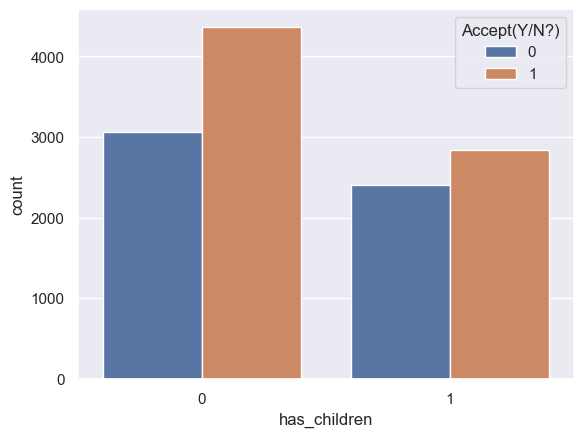

In [85]:
print(df_nonull['has_children'].value_counts())
sns.countplot( x = 'has_children' , data = df_nonull , hue = 'Accept(Y/N?)')
plt.show()

In [86]:
grouping('has_children')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


education
Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: count, dtype: int64


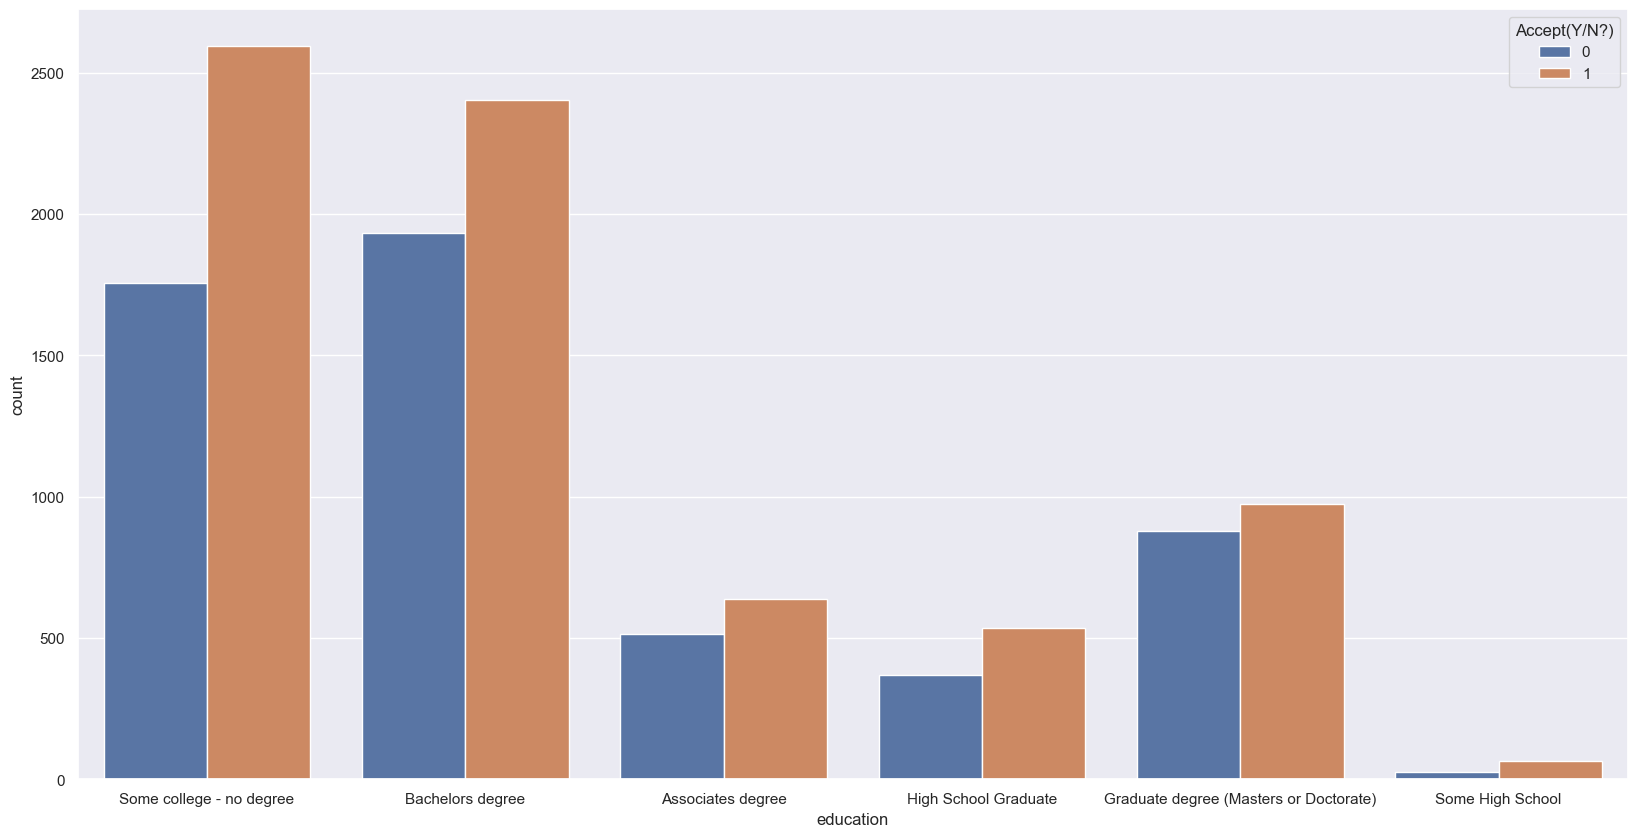

In [87]:
print(df_nonull['education'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'education' , data = df_nonull , hue = 'Accept(Y/N?)')
plt.show()

In [88]:
grouping('education')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

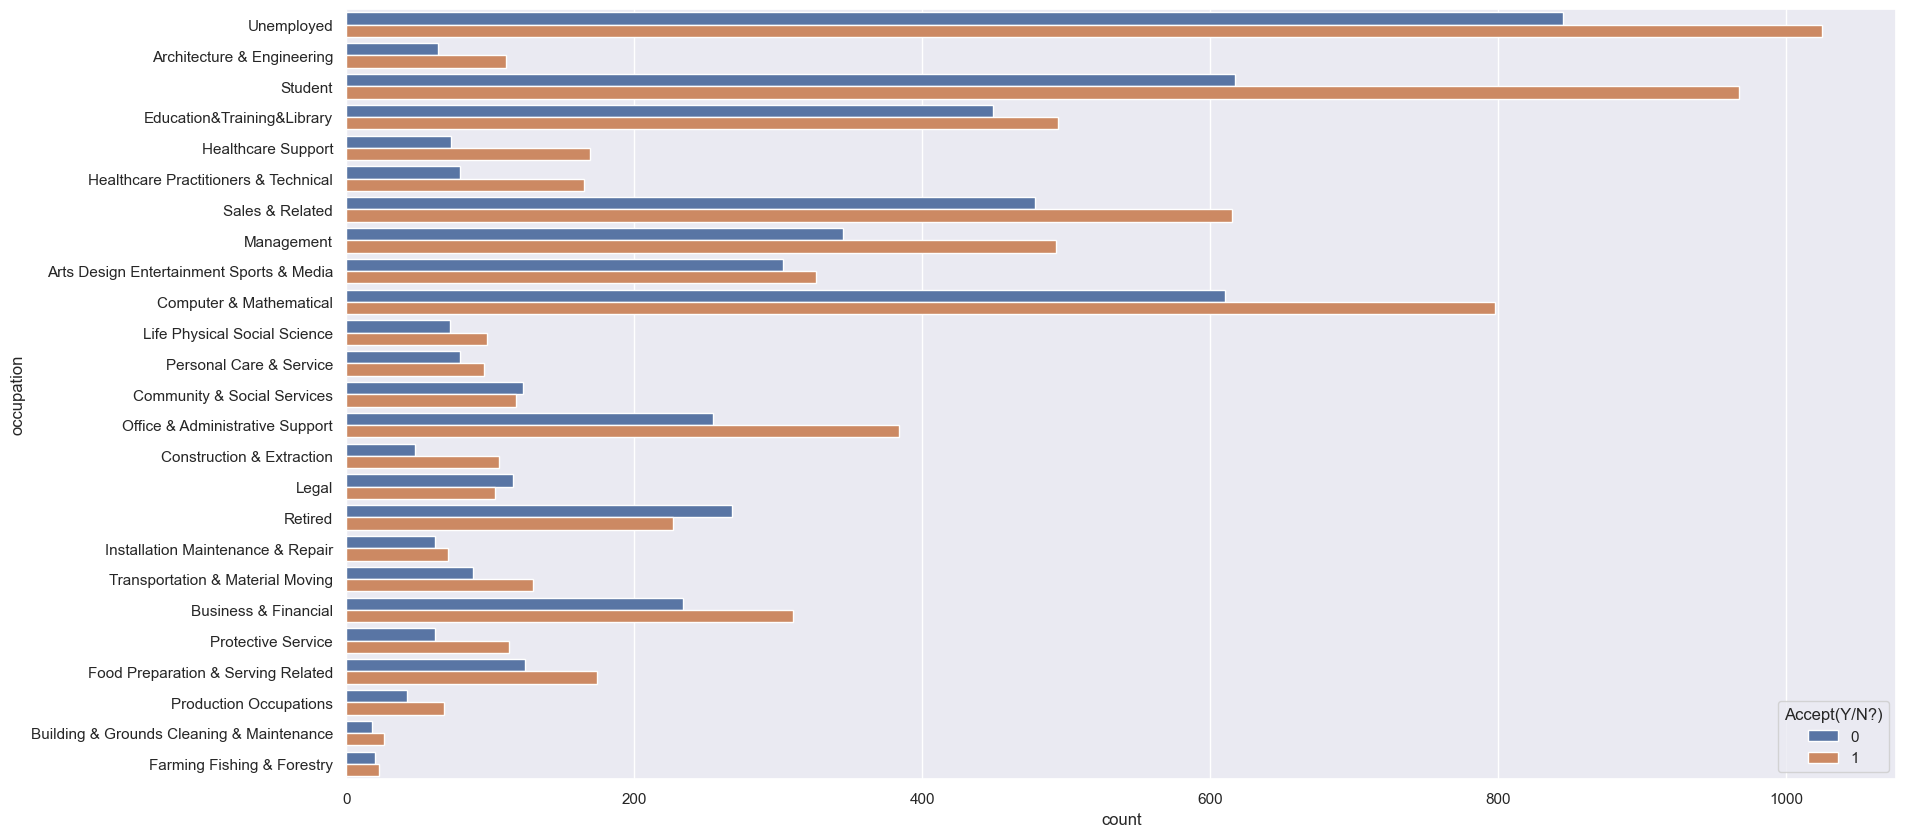

In [89]:
pd.set_option('display.max_rows' , 25)
print(df_nonull['occupation'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( y = 'occupation' , data = df_nonull , hue = 'Accept(Y/N?)' , orient='h')
plt.show()

In [90]:
grouping('occupation')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64


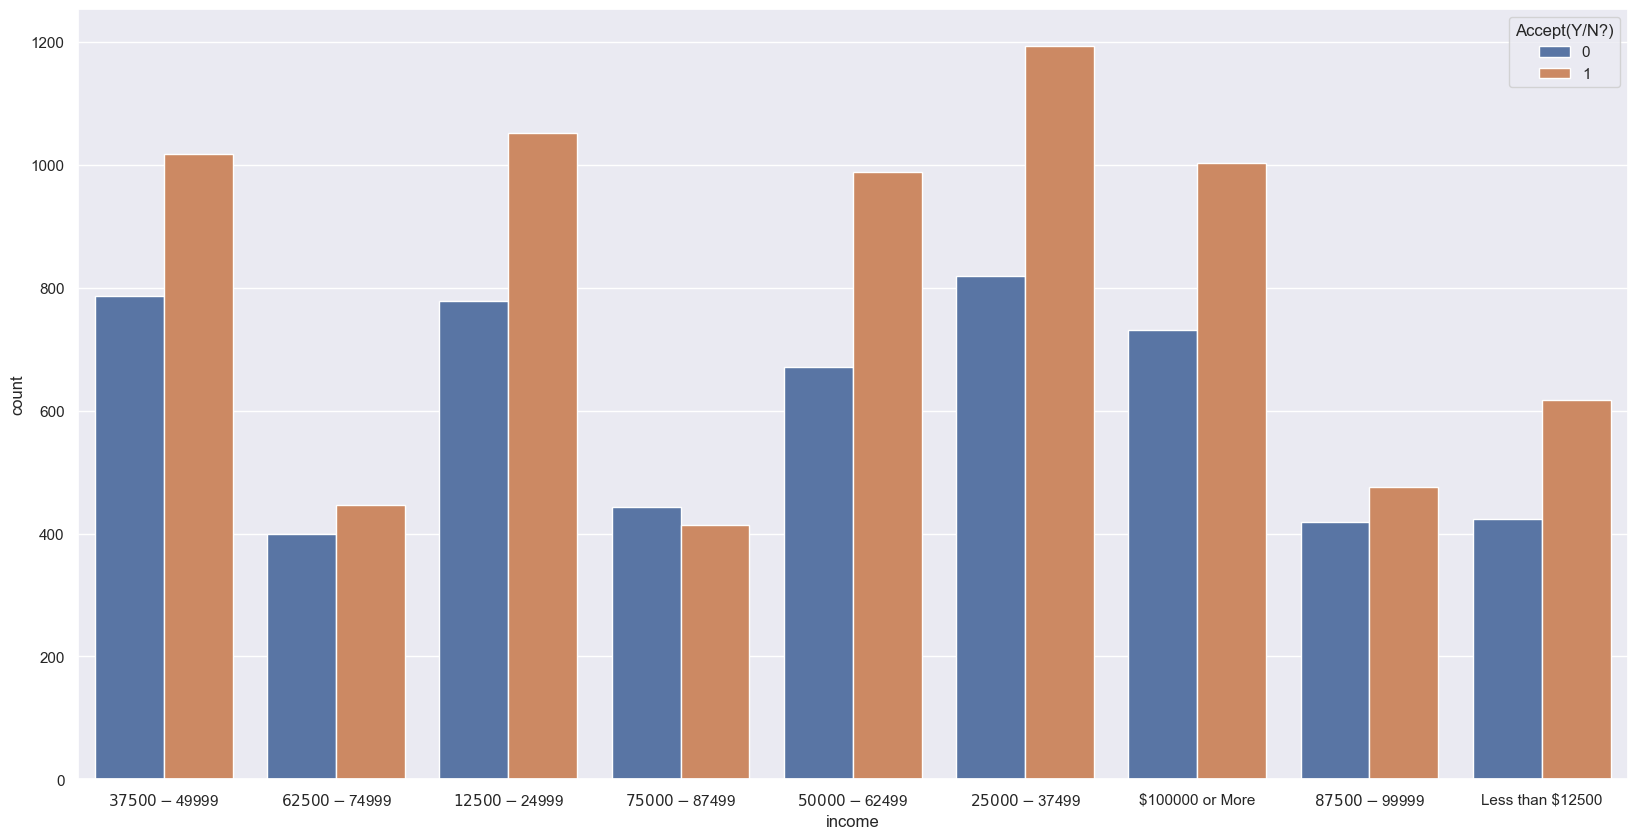

In [91]:
print(df_nonull['income'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'income' , data = df_nonull , hue = 'Accept(Y/N?)')
plt.show()

In [92]:
grouping('income')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


Bar
never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64


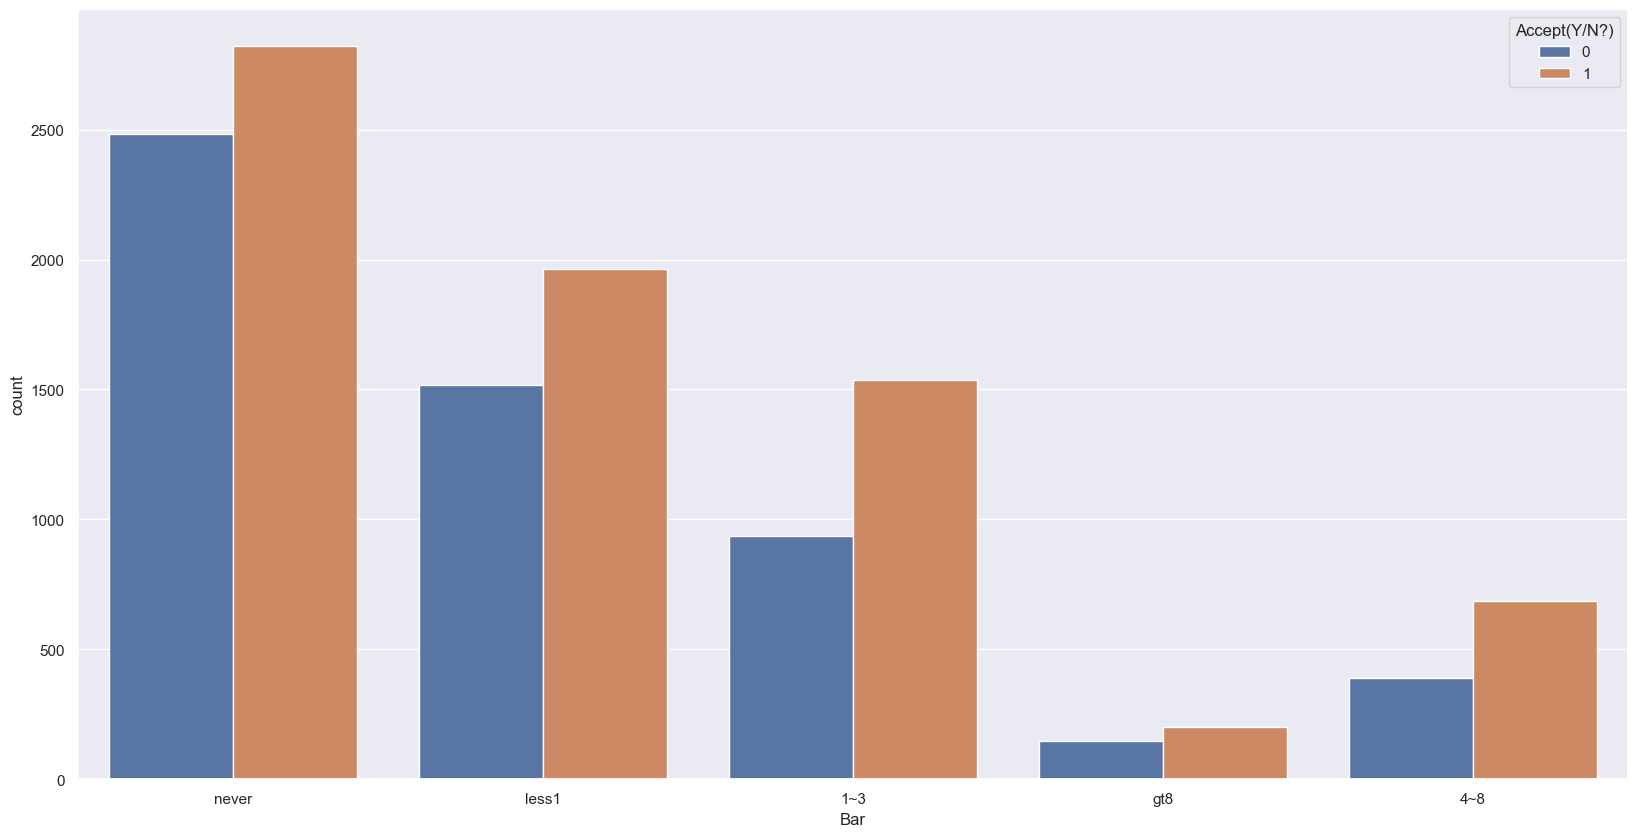

In [93]:
print(df_nonull['Bar'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'Bar' , data = df_nonull , hue = 'Accept(Y/N?)')
plt.show()

In [94]:
grouping('Bar')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


C:\Users\harsh\AppData\Local\Temp\ipykernel_15472\1066995632.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Bar' , y = 'Accept(Y/N?)' , data = df_nonull , hue = 'coupon' , ci = None)


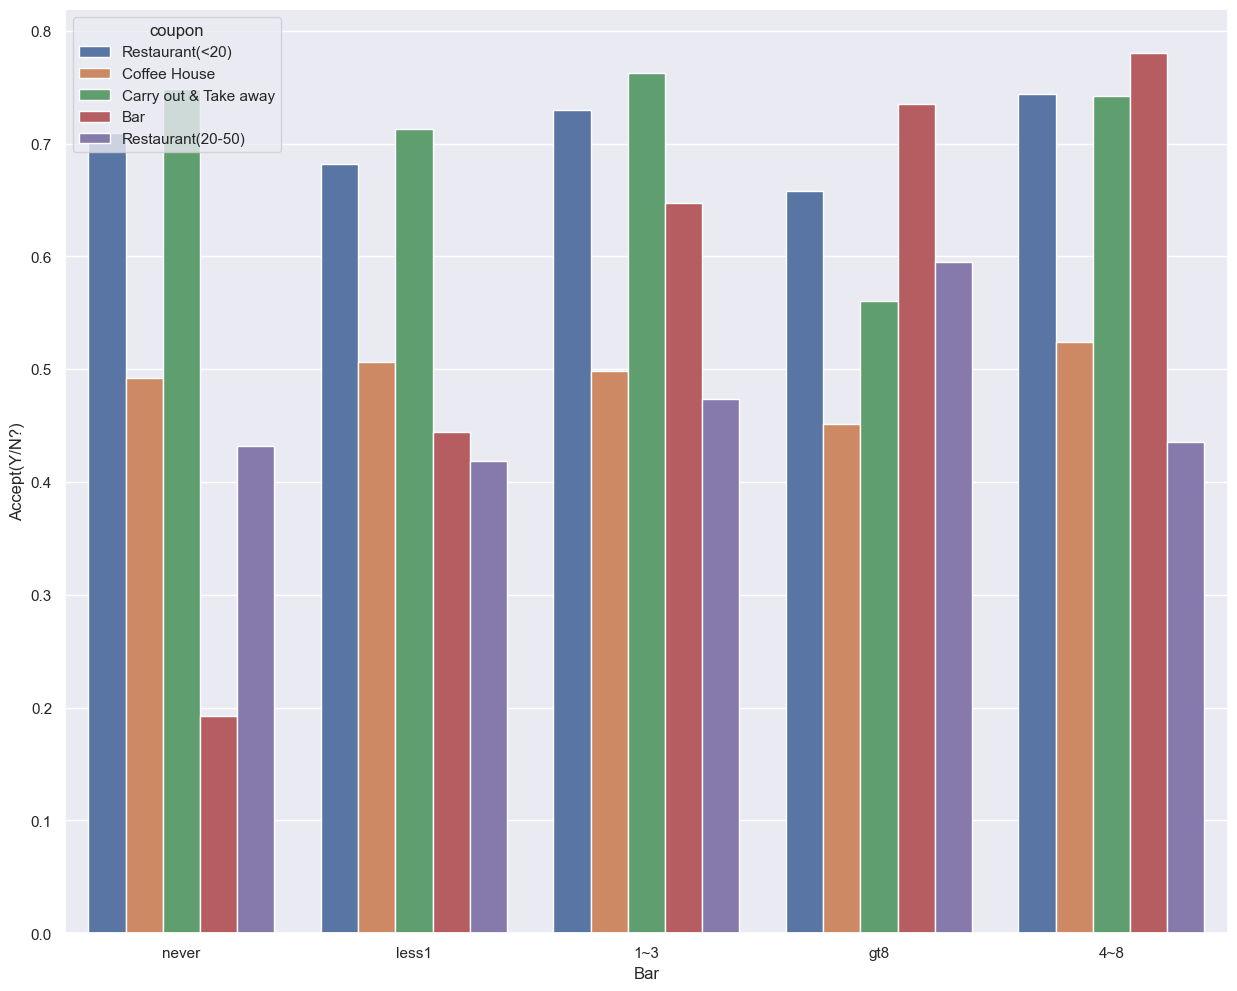

In [95]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'Bar' , y = 'Accept(Y/N?)' , data = df_nonull , hue = 'coupon' , ci = None)
plt.show()

CoffeeHouse
less1    3602
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64


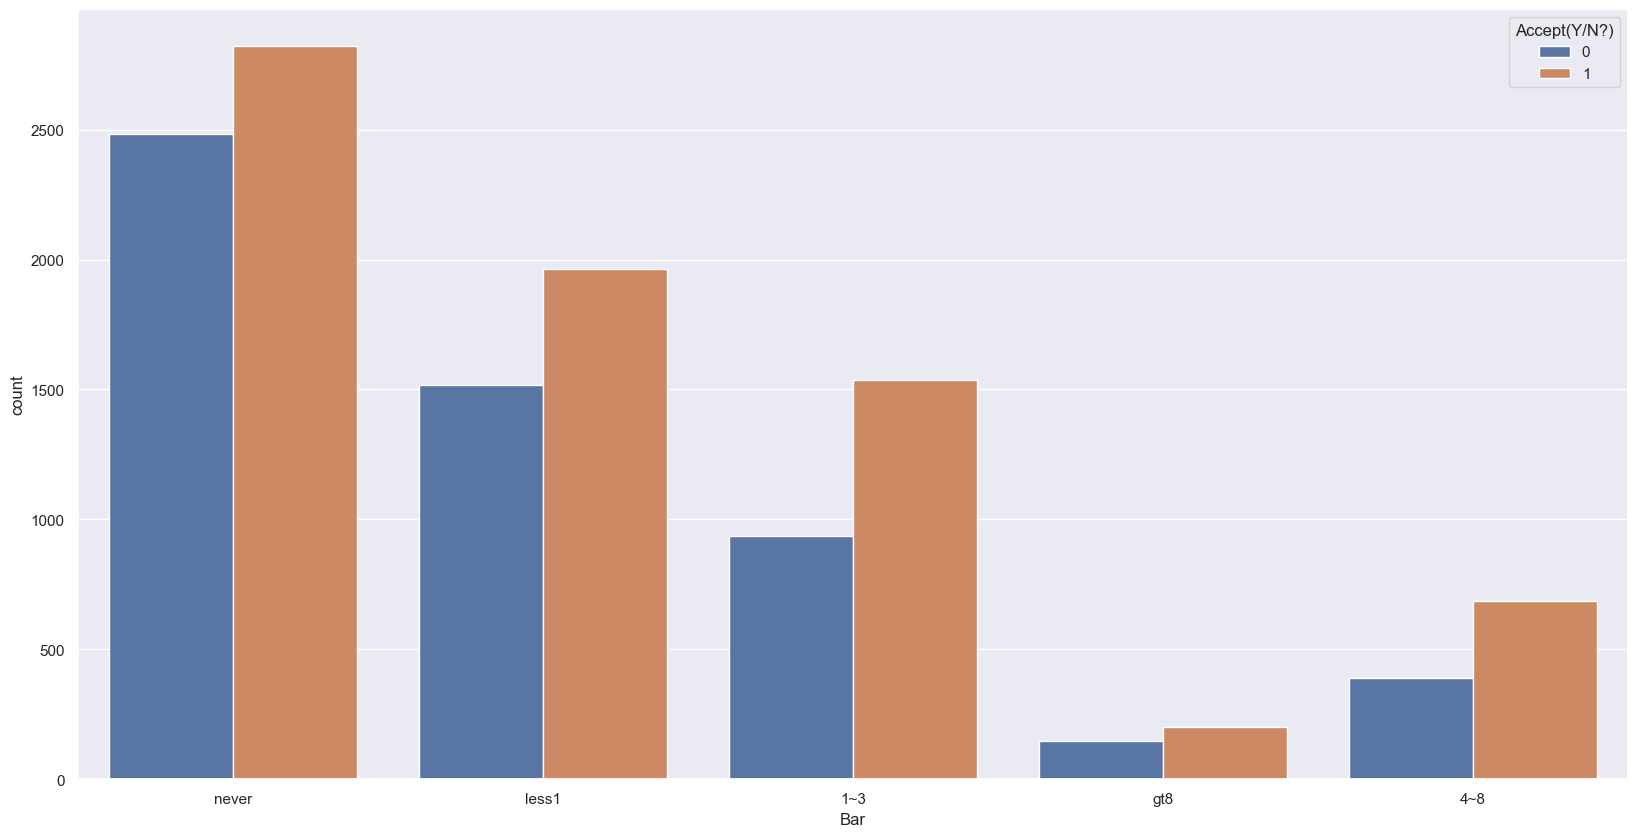

In [96]:
print(df_nonull['CoffeeHouse'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'Bar' , data = df_nonull , hue = 'Accept(Y/N?)')
plt.show()

In [97]:
grouping('CoffeeHouse')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


C:\Users\harsh\AppData\Local\Temp\ipykernel_15472\1713960306.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'CoffeeHouse' , y = 'Accept(Y/N?)' , data = df_nonull , hue = 'coupon' , ci = None)


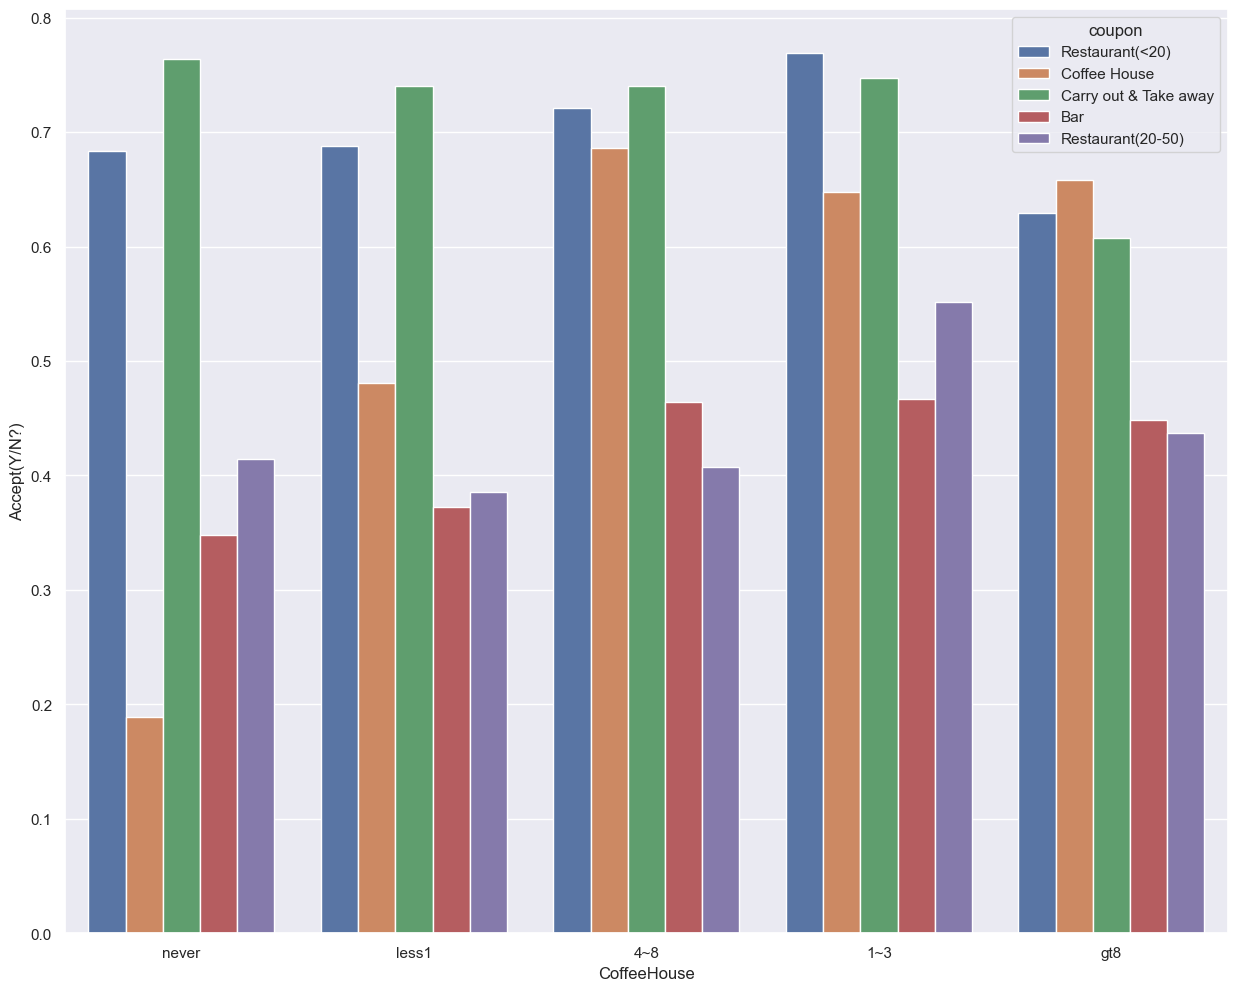

In [98]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'CoffeeHouse' , y = 'Accept(Y/N?)' , data = df_nonull , hue = 'coupon' , ci = None)
plt.show()

CarryAway
1~3      4823
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64


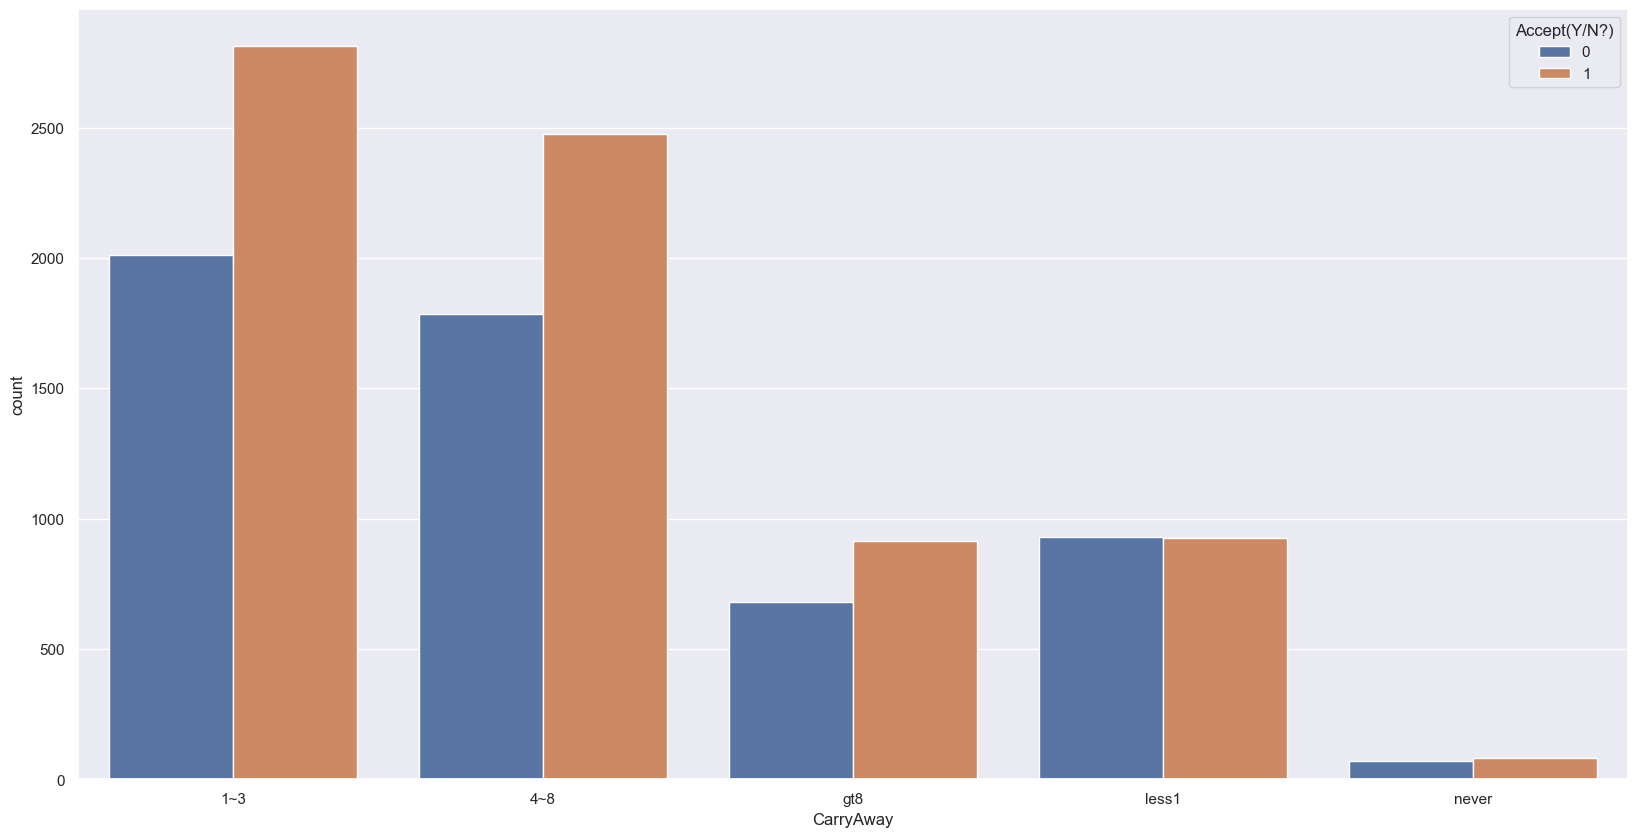

In [99]:
print(df_nonull['CarryAway'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'CarryAway' , data = df_nonull , hue = 'Accept(Y/N?)')
plt.show()

In [100]:
grouping('CarryAway')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


C:\Users\harsh\AppData\Local\Temp\ipykernel_15472\2221254714.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'CarryAway' , y = 'Accept(Y/N?)' , data = df_nonull , hue = 'coupon' , ci = None)


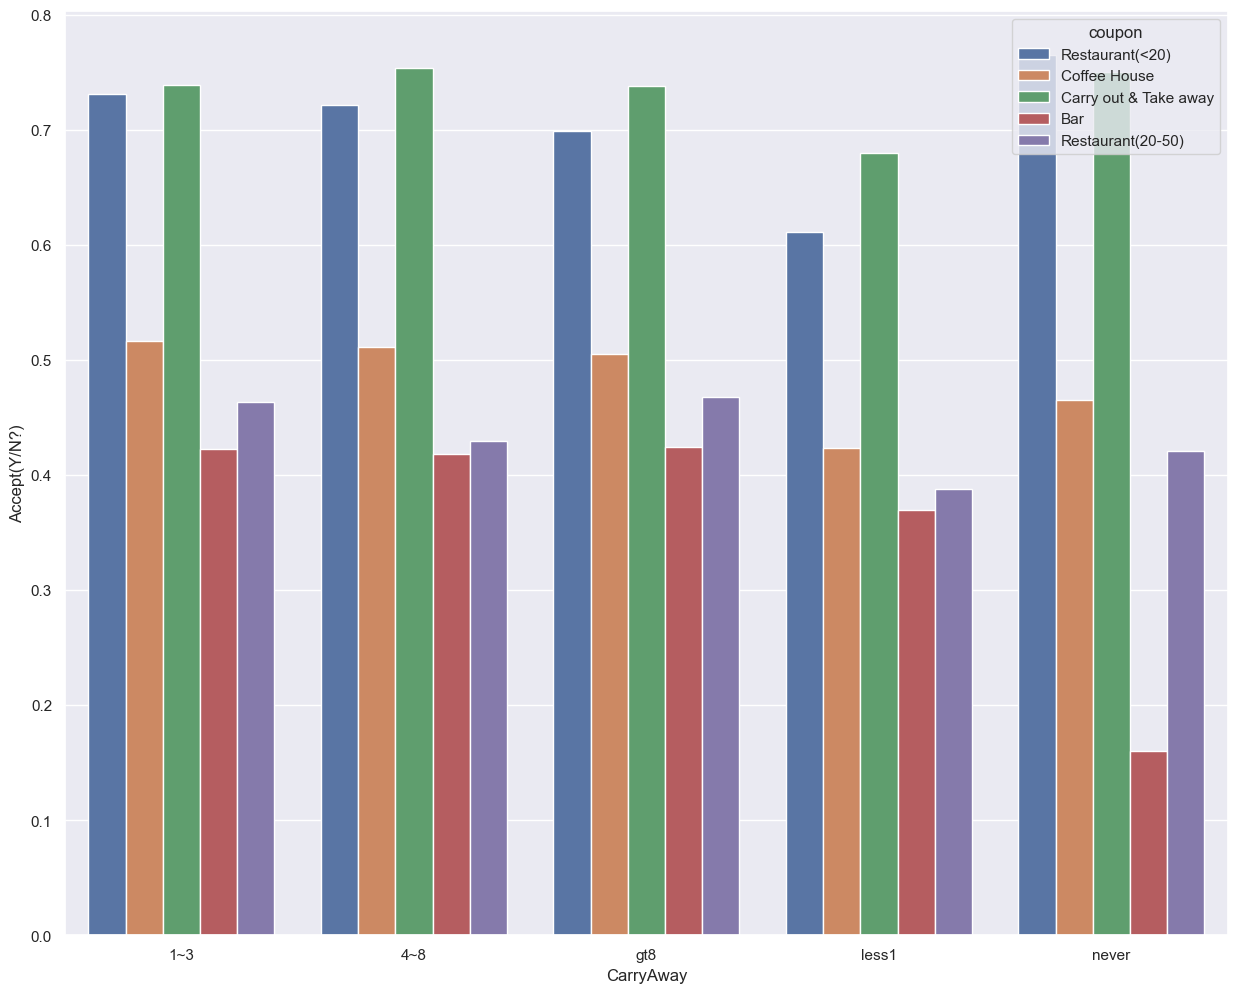

In [101]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'CarryAway' , y = 'Accept(Y/N?)' , data = df_nonull , hue = 'coupon' , ci = None)
plt.show()

RestaurantLessThan20
1~3      5506
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64


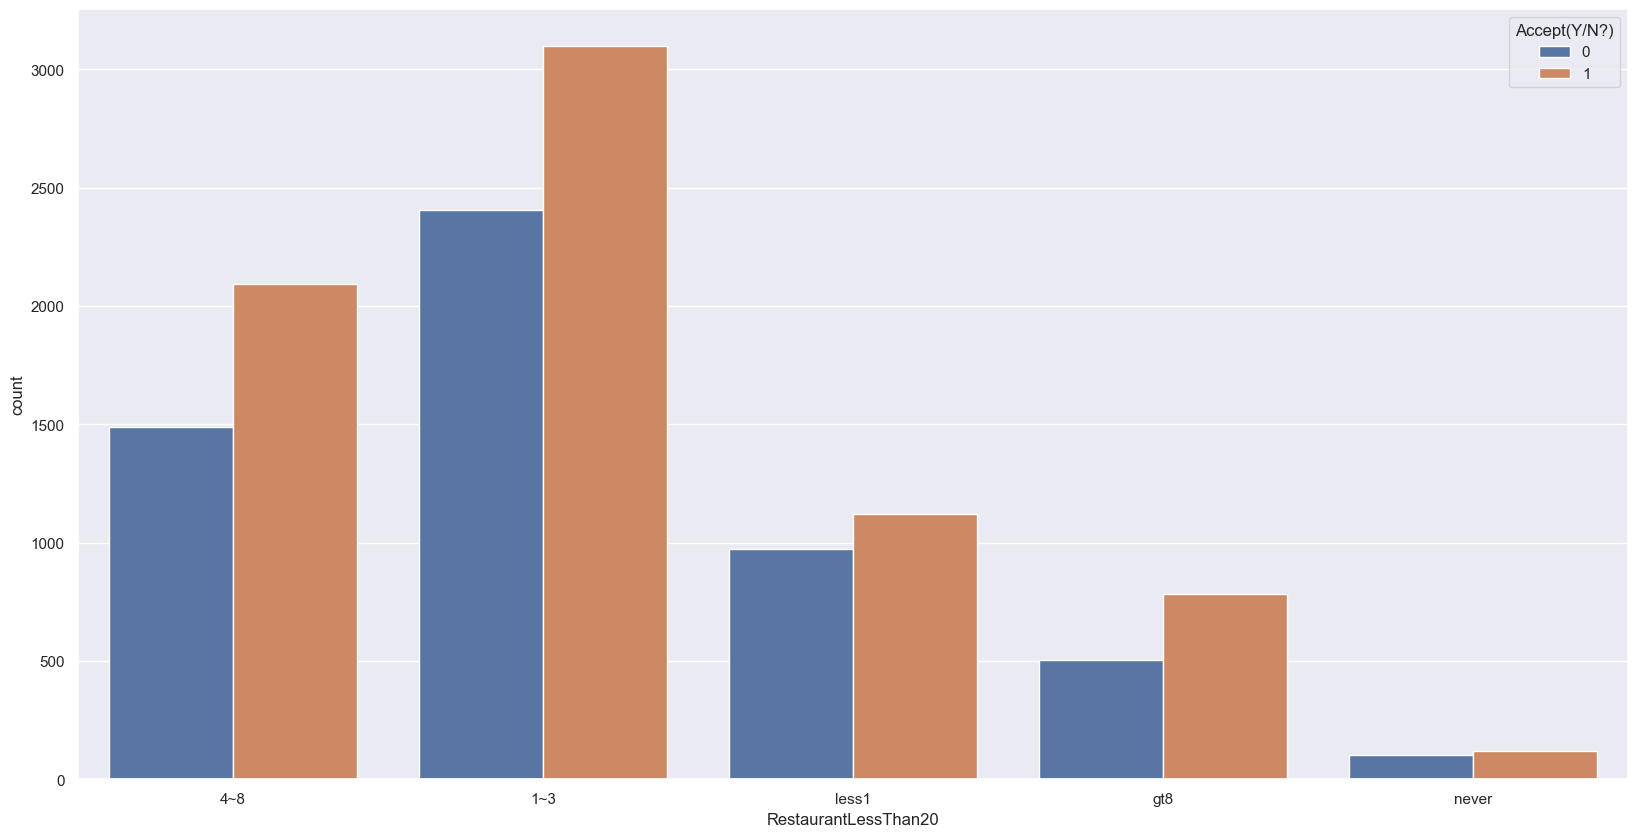

In [102]:
print(df_nonull['RestaurantLessThan20'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'RestaurantLessThan20' , data = df_nonull , hue = 'Accept(Y/N?)')
plt.show()

In [103]:
grouping('RestaurantLessThan20')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


C:\Users\harsh\AppData\Local\Temp\ipykernel_15472\3339490970.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'RestaurantLessThan20' , y = 'Accept(Y/N?)' , data = df_nonull , hue = 'coupon' , ci = None)


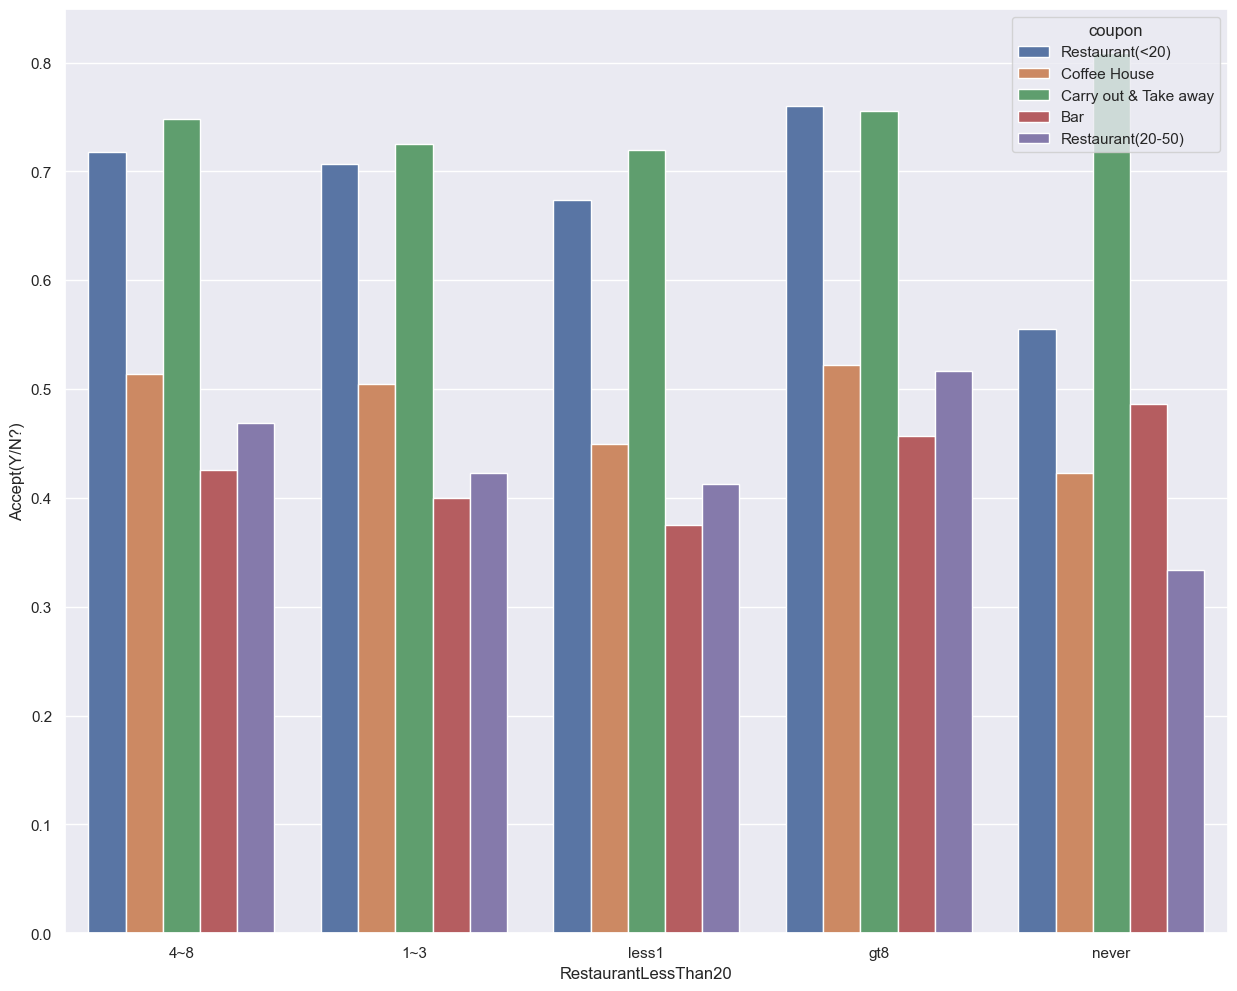

In [104]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'RestaurantLessThan20' , y = 'Accept(Y/N?)' , data = df_nonull , hue = 'coupon' , ci = None)
plt.show()

Restaurant20To50
less1    6266
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


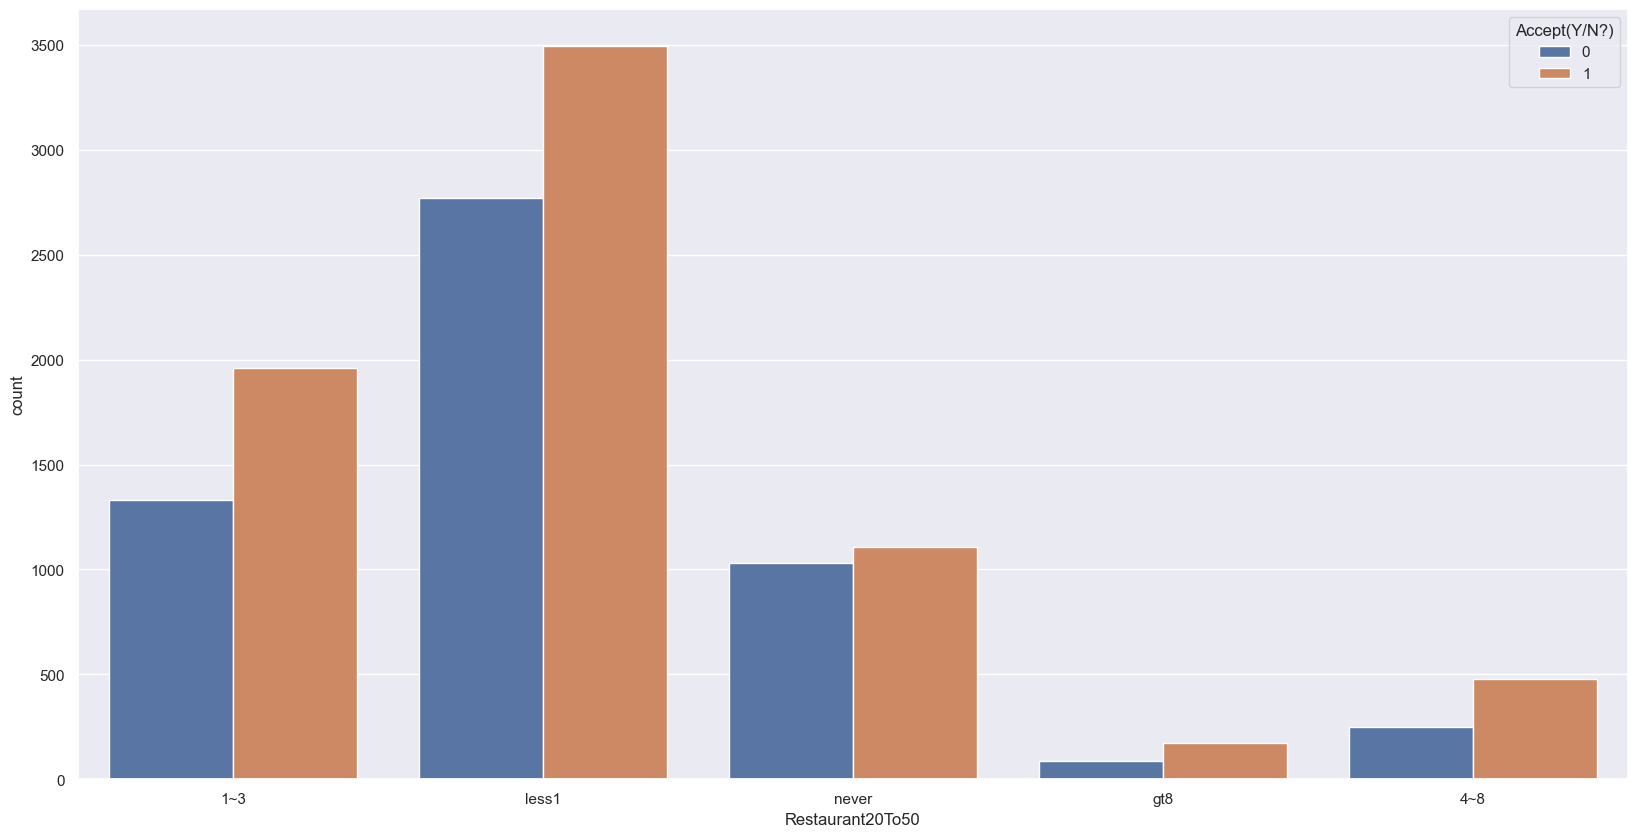

In [105]:
print(df_nonull['Restaurant20To50'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'Restaurant20To50' , data = df_nonull , hue = 'Accept(Y/N?)')
plt.show()

In [106]:
grouping('Restaurant20To50')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


C:\Users\harsh\AppData\Local\Temp\ipykernel_15472\2777409596.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Restaurant20To50' , y = 'Accept(Y/N?)' , data = df_nonull , hue = 'coupon' , ci = None)


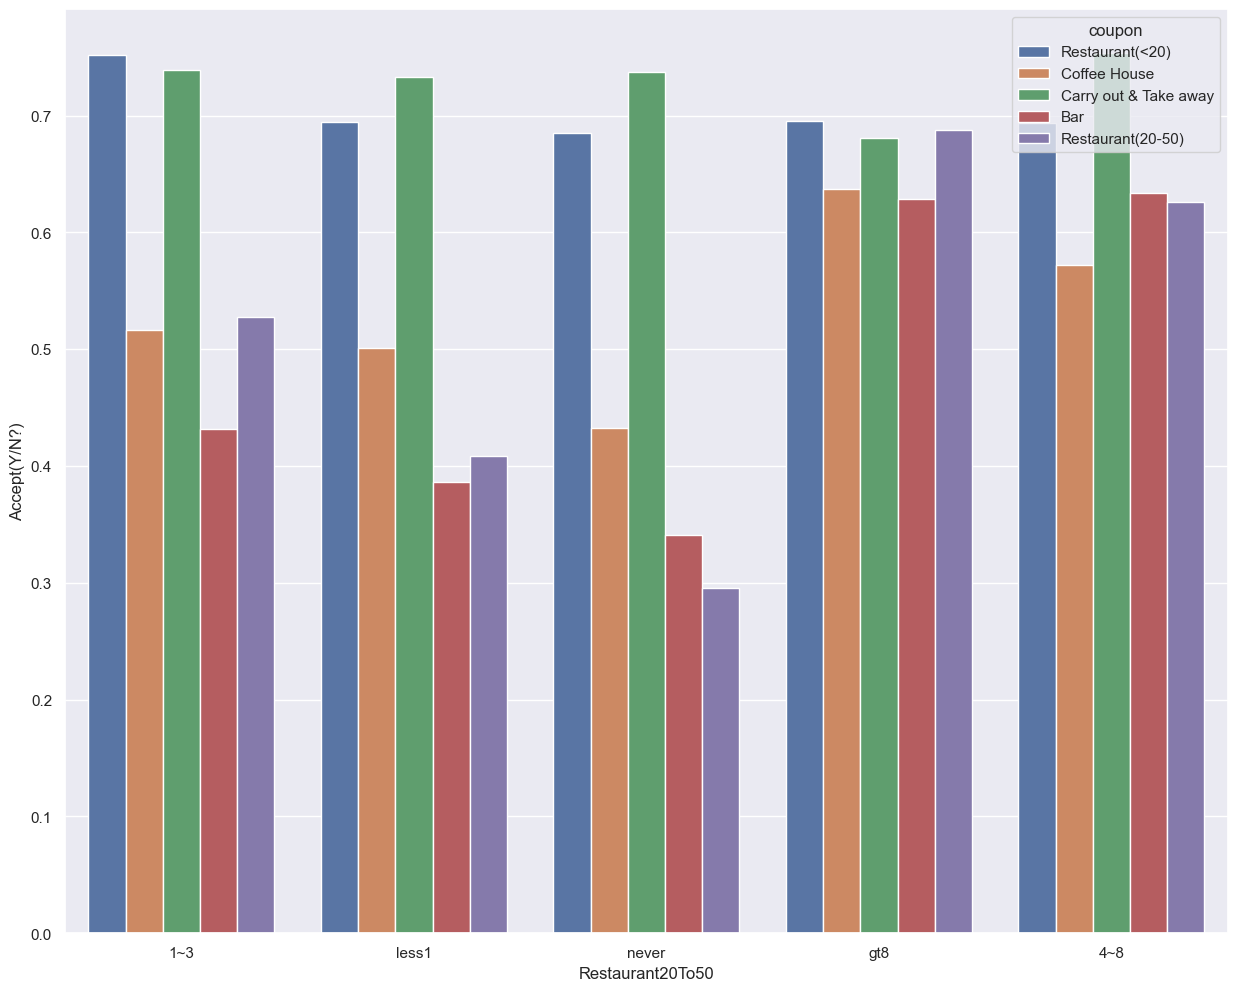

In [107]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'Restaurant20To50' , y = 'Accept(Y/N?)' , data = df_nonull , hue = 'coupon' , ci = None)
plt.show()

In [108]:
df_nonull['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

In [109]:
df_nonull['toCoupon_GEQ15min'].value_counts()

toCoupon_GEQ15min
1    7122
0    5562
Name: count, dtype: int64

In [110]:
df_nonull['toCoupon_GEQ25min'].value_counts()

toCoupon_GEQ25min
0    11173
1     1511
Name: count, dtype: int64

In [111]:
df_nonull.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [112]:
data_1 = df_nonull.copy()

In [113]:
drive_time = []
for i in range(data_1.shape[0]) :
    if (data_1['toCoupon_GEQ15min'][i]) == 0 :
        drive_time.append('Less than 15 mins')
    elif ((data_1['toCoupon_GEQ15min'][i]) == 1 ) and ((data_1['toCoupon_GEQ25min'][i]) == 0) :
        drive_time.append('15 to 25 mins')
    else :
        drive_time.append('More than 25 mins')

In [114]:
data_1['drive_time'] = drive_time

In [115]:
data_1.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?),drive_time
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,0,0,0,1,1,Less than 15 mins
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,0,0,0,1,0,Less than 15 mins
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,1,0,0,1,1,15 to 25 mins
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,1,0,0,1,0,15 to 25 mins
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,1,0,0,1,0,15 to 25 mins


drive_time
15 to 25 mins        5611
Less than 15 mins    5562
More than 25 mins    1511
Name: count, dtype: int64


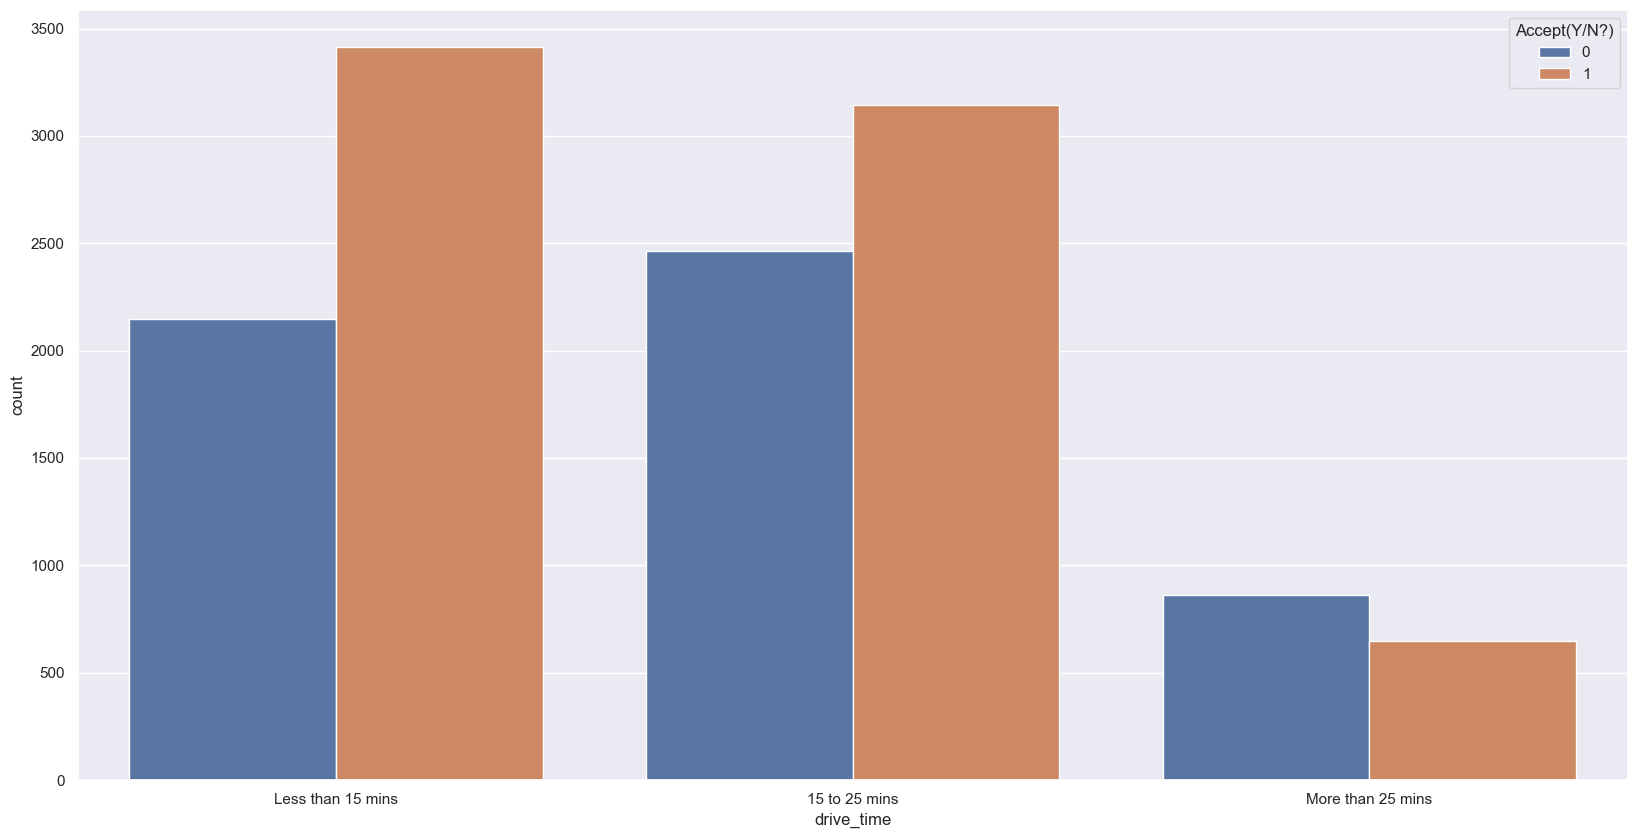

In [116]:
print(data_1['drive_time'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'drive_time' , data = data_1 , hue = 'Accept(Y/N?)')
plt.show()

In [117]:
b = pd.DataFrame(data_1.groupby('drive_time')['Accept(Y/N?)'].count())
b['accepted'] = data_1[data_1['Accept(Y/N?)'] == 1].groupby('drive_time')['Accept(Y/N?)'].count()
b['rejected'] = data_1[data_1['Accept(Y/N?)'] == 0].groupby('drive_time')['Accept(Y/N?)'].count()
b['% Accepted'] = ((b['accepted']) / (b['Accept(Y/N?)']))*100
b['% Rejected'] = ((b['rejected']) / (b['Accept(Y/N?)']))*100
b

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
drive_time,,,,,
15 to 25 mins,5611,3146,2465,56.068437,43.931563
Less than 15 mins,5562,3416,2146,61.416757,38.583243
More than 25 mins,1511,648,863,42.885506,57.114494


C:\Users\harsh\AppData\Local\Temp\ipykernel_15472\3743642852.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'drive_time' , y = 'Accept(Y/N?)' , data = data_1 , hue = 'coupon' , ci = None)


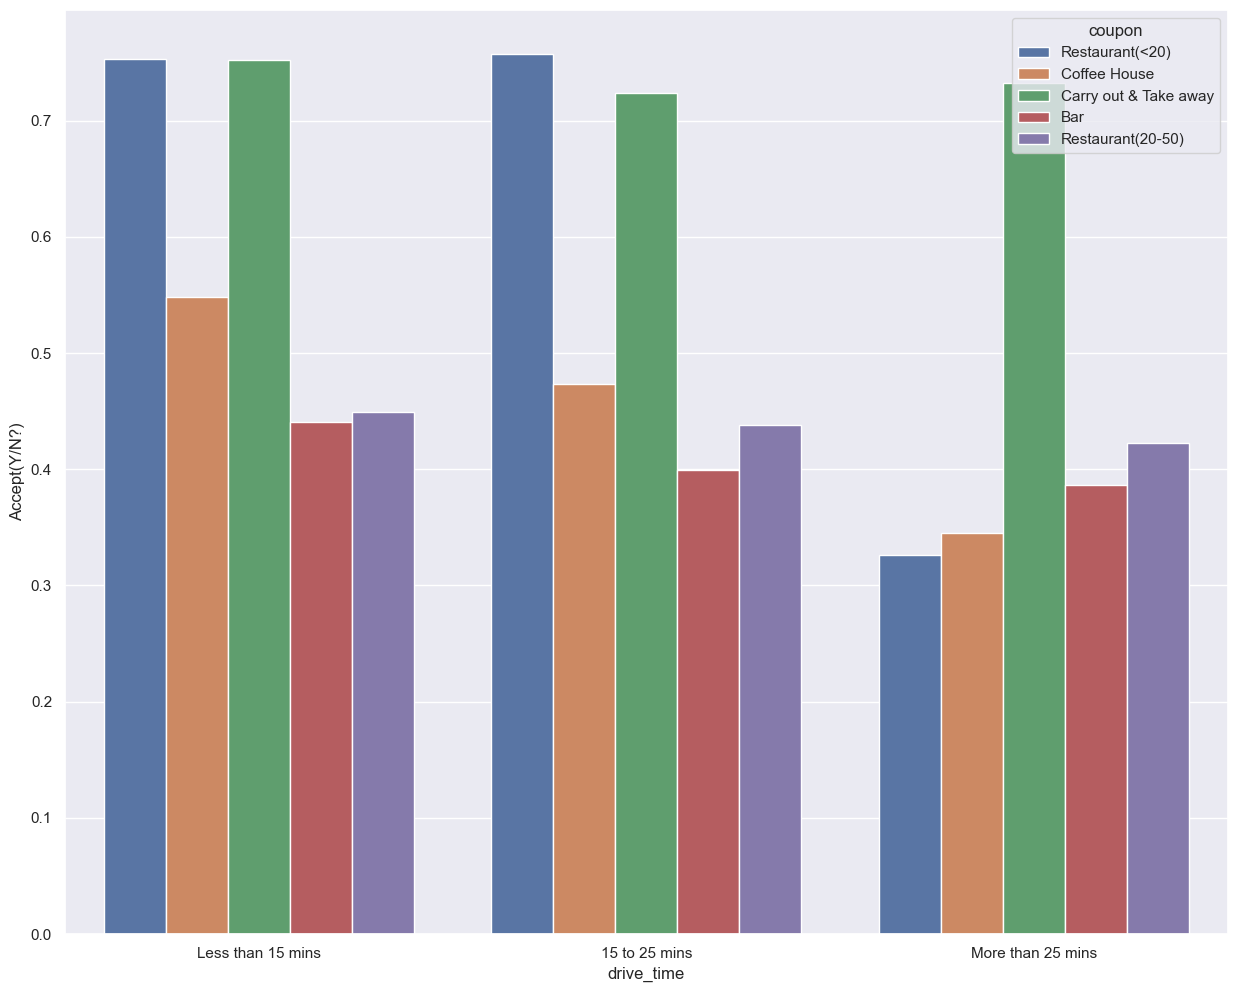

In [118]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'drive_time' , y = 'Accept(Y/N?)' , data = data_1 , hue = 'coupon' , ci = None)
plt.show()

In [119]:
data_1.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?),drive_time
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,0,0,0,1,1,Less than 15 mins
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,0,0,0,1,0,Less than 15 mins
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,1,0,0,1,1,15 to 25 mins
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,1,0,0,1,0,15 to 25 mins
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,1~3,4~8,1~3,1,1,0,0,1,0,15 to 25 mins


In [120]:
# Now we can drop toCoupon_GEQ5min , toCoupon_GEQ15min , toCoupon_GEQ25min since we have created a new variable drive_time
data_1 = data_1.drop(['toCoupon_GEQ5min' , 'toCoupon_GEQ15min' , 'toCoupon_GEQ25min'] , axis = 1)
data_1.shape

(12684, 22)

In [121]:
data_1.rename(columns = {'Accept(Y/N?)'  : 'Accept'} , inplace = True)
data_1.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Accept,drive_time
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,Less than 15 mins
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,Less than 15 mins
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,15 to 25 mins
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,15 to 25 mins
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,15 to 25 mins


ANOVA TEST

In [122]:
# Checking significance for Feature Occupation through Anova test


import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Accept ~ occupation' , data = data_1).fit()
anova_result = sm.stats.anova_lm(model, typ = 2)
print(anova_result)


                 sum_sq       df         F        PR(>F)
occupation    29.411863     24.0  5.033285  8.472695e-15
Residual    3082.188579  12659.0       NaN           NaN


In [123]:
data_1.shape

(12684, 22)

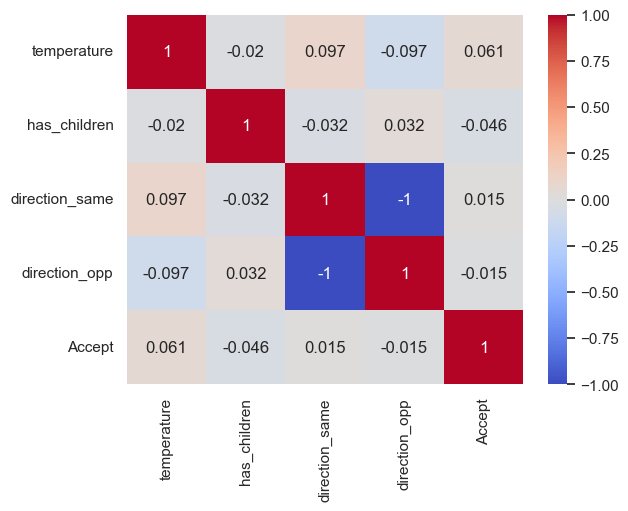

In [124]:
data_subset = data_1[['temperature', 'has_children','direction_same', 'direction_opp', 'Accept']]

# Convert 'object' type columns to 'category' and then to numeric codes
for col in data_subset.select_dtypes(include=['object']):
    data_subset[col] = data_subset[col].astype('category').cat.codes

# Create the heatmap with the selected data
sns.heatmap(data_subset.corr(), annot = True, cmap = 'coolwarm')
plt.show()

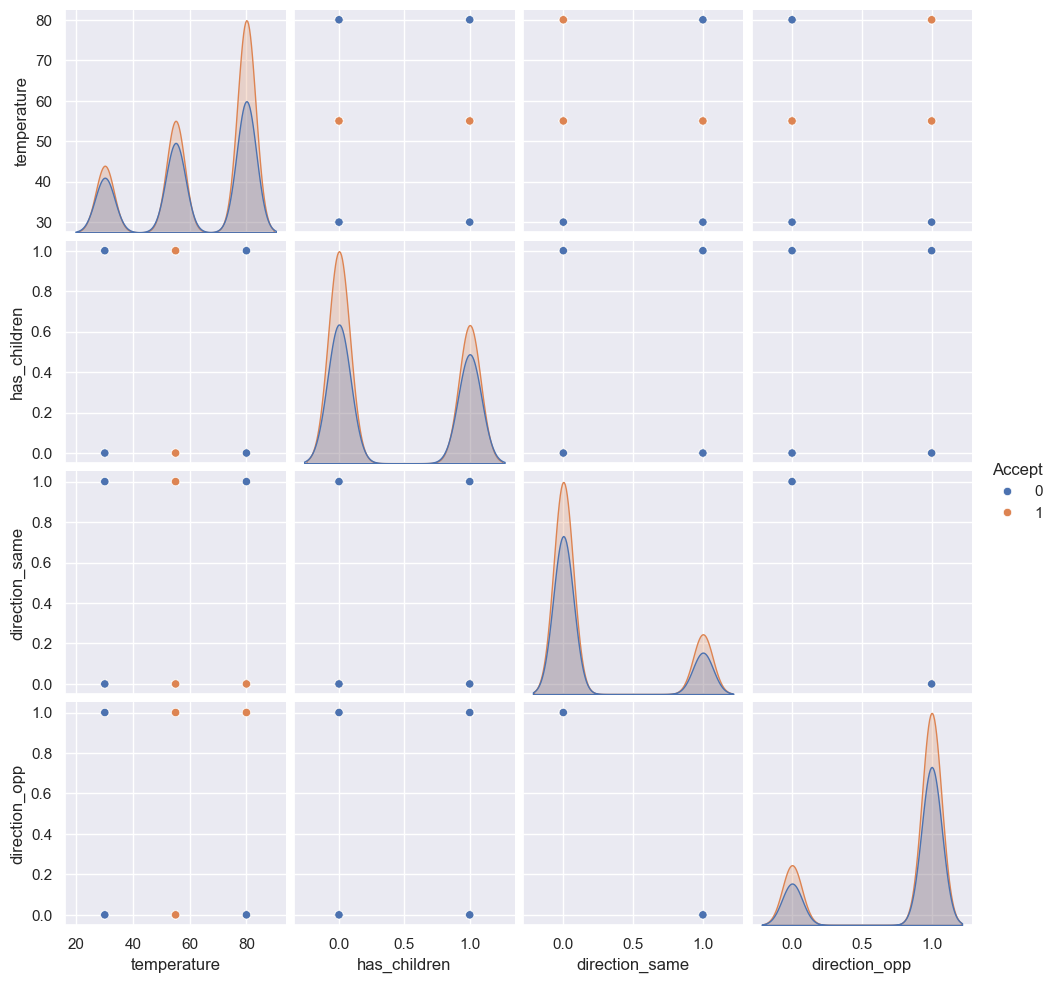

In [125]:
sns.pairplot(data = data_subset , hue = 'Accept')
plt.show()

In [126]:
for col in data_1.select_dtypes(include=['object']):
    data_1[col] = data_1[col].astype('category').cat.codes

corr_data= data_1.corr()

In [127]:
corr_data

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Accept,drive_time
destination,1.000000,-0.117811,-0.078305,-0.027633,-0.011468,-0.032594,0.006779,-0.002112,0.003036,-0.006707,...,-0.014554,-0.005048,-0.007185,-0.007676,0.003497,-0.000255,-0.083328,0.083328,-0.001906,0.085764
passanger,-0.117811,1.000000,0.059821,0.056127,0.018767,0.074764,-0.020896,0.004969,-0.021376,0.034542,...,-0.002329,0.015055,-0.008619,-0.017223,-0.030378,-0.030401,-0.268830,0.268830,0.051614,-0.236743
weather,-0.078305,0.059821,1.000000,0.434497,0.147008,0.017702,-0.027003,-0.019725,-0.016816,0.012657,...,-0.032758,0.010426,-0.006018,-0.038593,-0.005306,0.005795,0.017712,-0.017712,0.098800,-0.104810
temperature,-0.027633,0.056127,0.434497,1.000000,0.128771,0.124090,-0.025504,-0.027556,0.003585,-0.019716,...,-0.025091,0.009142,0.007491,-0.032657,-0.001289,0.001833,0.097085,-0.097085,0.061240,-0.093235
coupon,-0.011468,0.018767,0.147008,0.128771,1.000000,0.148383,0.007134,0.002314,-0.000132,-0.010422,...,0.000871,-0.007581,-0.002124,-0.003012,0.010651,0.005592,-0.073007,0.073007,0.097019,-0.011510
expiration,-0.032594,0.074764,0.017702,0.124090,0.148383,1.000000,-0.001264,0.006523,-0.012328,0.016020,...,-0.011180,-0.008656,-0.012669,-0.003832,-0.010471,-0.000457,0.033584,-0.033584,-0.129920,-0.062975
gender,0.006779,-0.020896,-0.027003,-0.025504,0.007134,-0.001264,1.000000,-0.060720,0.057552,-0.159956,...,0.026677,-0.154986,0.059404,-0.017530,0.044519,-0.000209,-0.004496,0.004496,0.043969,0.007787
age,-0.002112,0.004969,-0.019725,-0.027556,0.002314,0.006523,-0.060720,1.000000,-0.177495,0.306306,...,0.048782,0.206363,-0.000636,0.088903,-0.028640,-0.001232,-0.008279,0.008279,-0.035241,-0.019563
maritalStatus,0.003036,-0.021376,-0.016816,0.003585,-0.000132,-0.012328,0.057552,-0.177495,1.000000,-0.433628,...,0.073555,-0.091539,0.011661,-0.024881,-0.001253,0.044802,0.016504,-0.016504,0.025083,0.041101
has_children,-0.006707,0.034542,0.012657,-0.019716,-0.010422,0.016020,-0.159956,0.306306,-0.433628,1.000000,...,-0.000569,0.167292,-0.013537,0.006573,-0.074252,-0.000614,-0.031620,0.031620,-0.045557,-0.070557


In [128]:
grouping('has_children')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


In [129]:
grouping('direction_same')

,Accept(Y/N?),accepted,rejected,% Accepted,% Rejected
destination,,,,,
Home,3237,1639,1598,50.633302,49.366698
No Urgent Place,6283,3982,2301,63.377367,36.622633
Work,3164,1589,1575,50.221239,49.778761


In [130]:
data_2 = data_1.copy()

In [131]:
data_2.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Accept,drive_time
0,1,0,2,55,4,0,0,0,3,1,...,3,4,4,0,1,0,0,1,1,1
1,1,1,2,80,2,1,0,0,3,1,...,3,4,4,0,1,0,0,1,0,1
2,1,1,2,80,1,1,0,0,3,1,...,3,4,4,0,1,0,0,1,1,0
3,1,1,2,80,2,1,0,0,3,1,...,3,4,4,0,1,0,0,1,0,0
4,1,1,2,80,2,0,0,0,3,1,...,3,4,4,0,1,0,0,1,0,0


In [132]:
data_2 = data_2.drop(['has_children' ,'direction_same' , 'direction_opp'] , axis =1)
data_2.shape

(12684, 19)

In [133]:
# Dummy Variables 

data_2.columns.tolist()

['destination',
 'passanger',
 'weather',
 'temperature',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'Accept',
 'drive_time']

In [134]:
data_2.shape

(12684, 19)

In [135]:
# SPLITTING INTO X AND Y 

x = data_2.drop(['Accept'] , axis = 1)
y = data_2[['Accept']]

In [136]:
x.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,drive_time
0,1,0,2,55,4,0,0,0,3,5,24,3,4,4,0,1,0,1
1,1,1,2,80,2,1,0,0,3,5,24,3,4,4,0,1,0,1
2,1,1,2,80,1,1,0,0,3,5,24,3,4,4,0,1,0,0
3,1,1,2,80,2,1,0,0,3,5,24,3,4,4,0,1,0,0
4,1,1,2,80,2,0,0,0,3,5,24,3,4,4,0,1,0,0


In [137]:
y.head()

,Accept
0,1
1,0
2,1
3,0
4,0


# Feature Scaling 

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[ 0.00810187, -0.71437297,  0.47596959, ..., -0.04242276,
        -1.52088509,  0.47815094],
       [ 0.00810187,  0.34726813,  0.47596959, ..., -0.04242276,
        -1.52088509,  0.47815094],
       [ 0.00810187,  0.34726813,  0.47596959, ..., -0.04242276,
        -1.52088509, -1.0010848 ],
       ...,
       [ 1.41582892, -0.71437297, -1.10238291, ..., -0.04242276,
        -1.52088509,  0.47815094],
       [ 1.41582892, -0.71437297, -1.10238291, ..., -0.04242276,
        -1.52088509,  1.95738669],
       [ 1.41582892, -0.71437297,  0.47596959, ..., -0.04242276,
        -1.52088509,  0.47815094]])

# Train test Split

In [139]:
# Passing scaled data for logistic regression

In [140]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(sc_x , y , test_size = 0.25 , random_state = 101 )
print( x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(9513, 18) (3171, 18) (9513, 1) (3171, 1)


In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
logr = LogisticRegression()

In [143]:
logit = logr.fit(x_train , y_train)

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [144]:
y_pred_test_lr = logit.predict(x_test)
y_pred_train_lr = logit.predict(x_train)

In [145]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix 

In [146]:
print('Training_accuracy :' , accuracy_score(y_train , y_pred_train_lr))
print('**********************')
print('Testing_accuracy :' , accuracy_score(y_test , y_pred_test_lr))

Training_accuracy : 0.6305056238831074
**********************
Testing_accuracy : 0.619678334910123


In [147]:
# Passing unscaled data 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 101 )
print( x_train.shape , x_test.shape , y_train.shape , y_test.shape)


(9513, 18) (3171, 18) (9513, 1) (3171, 1)


In [148]:
logit = logr.fit(x_train , y_train)

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [149]:
y_pred_test_unscaled = logit.predict(x_test)
y_pred_train_unscaled = logit.predict(x_train)

In [150]:
print('Training_accuracy :' , accuracy_score(y_train , y_pred_train_unscaled))
print('**********************')
print('Testing_accuracy :' , accuracy_score(y_test , y_pred_test_unscaled))

Training_accuracy : 0.6297697887101861
**********************
Testing_accuracy : 0.6174708293913592


# DECISION TREE 

In [151]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 101 )
print( x_train.shape , x_test.shape , y_train.shape , y_test.shape)


(9513, 18) (3171, 18) (9513, 1) (3171, 1)


In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train,y_train)

In [154]:
y_pred_test_dtree = dt.predict(x_test)
y_pred_train_dtree = dt.predict(x_train)

In [155]:
print('Training_accuracy :' , accuracy_score(y_train , y_pred_train_dtree))
print('**********************')
print('Testing_accuracy :' , accuracy_score(y_test , y_pred_test_dtree))

Training_accuracy : 0.9915904551666141
**********************
Testing_accuracy : 0.6799116997792495


In [156]:
y.value_counts()/len(y)*100

Accept
1         56.843267
0         43.156733
Name: count, dtype: float64

In [157]:
dt.feature_importances_

array([0.05809164, 0.05131567, 0.0232438 , 0.0387037 , 0.11457476,
       0.03053328, 0.02302265, 0.06271694, 0.03823753, 0.04523368,
       0.10161438, 0.08777622, 0.06819733, 0.05917412, 0.04994237,
       0.04362488, 0.04574547, 0.05825158])

In [158]:
pd.set_option('display.max_rows' , 50)
pd.DataFrame(index = x.columns , data = dt.feature_importances_ , columns = ['Feature Importance'])

,Feature Importance
destination,0.058092
passanger,0.051316
weather,0.023244
temperature,0.038704
coupon,0.114575
expiration,0.030533
gender,0.023023
age,0.062717
maritalStatus,0.038238
education,0.045234


In [159]:
print(classification_report(y_test , y_pred_test_dtree))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1335
           1       0.73      0.71      0.72      1836

    accuracy                           0.68      3171
   macro avg       0.67      0.67      0.67      3171
weighted avg       0.68      0.68      0.68      3171



# RANDOM FOREST 

In [160]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
rf = RF.fit(x_train , y_train)

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [161]:
y_pred_test_rf = rf.predict(x_test)
y_pred_train_rf = rf.predict(x_train)

In [162]:
print('Training_accuracy_rf :' , accuracy_score(y_train , y_pred_train_rf))
print('**********************')
print('Testing_accuracy_rf :' , accuracy_score(y_test , y_pred_test_rf))

Training_accuracy_rf : 0.9915904551666141
**********************
Testing_accuracy_rf : 0.7432986439608956


# SUPPORT VECTOR MACHINE

In [163]:
from sklearn.svm import SVC

In [164]:
svc = SVC()
svm = svc.fit(x_train,y_train)
y_pred_train_svm = svc.predict(x_train)
y_pred_test_svm = svc.predict(x_test)
print('training accu SVM:' , accuracy_score(y_train , y_pred_train_svm))
print('testing accu SVM :' , accuracy_score(y_test , y_pred_test_svm))

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accu SVM: 0.5870913486807526
testing accu SVM : 0.5900346893724377


# K-NEAREST NEIGHBOUR

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
knn = KNeighborsClassifier()
kn = knn.fit(x_train,y_train)

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [167]:
y_pred_train_knn = kn.predict(x_train.values)
y_pred_test_knn = kn.predict(x_test.values)

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [168]:
print('training accu knn:' , accuracy_score(y_train , y_pred_train_knn))
print('testing accu knn:' , accuracy_score(y_test , y_pred_test_knn))

training accu knn: 0.7527593818984547
testing accu knn: 0.6281929990539262


# GRADIENT BOOSTING CLASSIFIER


In [169]:
from sklearn.ensemble import GradientBoostingClassifier

In [170]:
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train,y_train)
y_pred_test_gd = gdb.predict(x_test)
y_pred_train_gd = gdb.predict(x_train)
print('training accu SVM:' , accuracy_score(y_train , y_pred_train_gd))
print('testing accu SVM :' , accuracy_score(y_test , y_pred_test_gd))

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accu SVM: 0.7363607694733523
testing accu SVM : 0.7193314411857458


# XG BOOSTING CLASSIFIER

In [171]:
from xgboost import XGBClassifier

In [172]:
xgb = XGBClassifier()
xg = xgb.fit(x_train,y_train)
y_pred_test_xgb = xg.predict(x_test)
y_pred_train_xgb = xg.predict(x_train)
print('training accu SVM:' , accuracy_score(y_train , y_pred_train_xgb))
print('testing accu SVM :' , accuracy_score(y_test , y_pred_test_xgb))

training accu SVM: 0.9192683695994954
testing accu SVM : 0.7555976032797225


# NAIVE BAYES CLASSIFIER

In [173]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [174]:
# Gaussian 

naive_gb = GaussianNB()
ngb = naive_gb.fit(x_train,y_train)
y_pred_test_ngb = ngb.predict(x_test)
y_pred_train_ngb = ngb.predict(x_train)
print('training accu NGB:' , accuracy_score(y_train , y_pred_train_ngb))
print('testing accu NGB :' , accuracy_score(y_test , y_pred_test_ngb))

training accu NGB: 0.6233575107747293
testing accu NGB : 0.6174708293913592


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [175]:
# Bernoulli 

naive_br = BernoulliNB()
nbr = naive_br.fit(x_train,y_train)
y_pred_test_nbr = nbr.predict(x_test)
y_pred_train_nbr = nbr.predict(x_train)
print('training accu NBR:' , accuracy_score(y_train , y_pred_train_nbr))
print('testing accu NBR :' , accuracy_score(y_test , y_pred_test_nbr))

training accu NBR: 0.6293493114685168
testing accu NBR : 0.6171554714601072


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [176]:
# GRADIENT BOOSTING yielded better result 

print('training accu GBM:' , accuracy_score(y_train , y_pred_train_gd))
print('testing accu GBM :' , accuracy_score(y_test , y_pred_test_gd))

training accu GBM: 0.7363607694733523
testing accu GBM : 0.7193314411857458


# HYPER PARAMETER TUNING USING GRID SEARCH CV

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
param_grid = {'n_estimators' : [50,100,200] ,
              'learning_rate' : [0.05 ,0.1 , 0.2 ],
              'max_depth'  : [3,5,7] }

In [179]:
gbm_model = GradientBoostingClassifier()

In [180]:
rf_grid = GridSearchCV(estimator = gbm_model , param_grid = param_grid ,scoring = 'accuracy', n_jobs = -1 , cv = 10)

In [181]:
rf_grid.fit(x_train , y_train)

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [182]:
rf_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

In [183]:
gbm = GradientBoostingClassifier(learning_rate = 0.1,n_estimators=200 , max_depth=7 )

In [184]:
gbm.fit(x_train , y_train)
y_pred_train_best_param = gbm.predict(x_train)
y_pred_test_best_param = gbm.predict(x_test)

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [185]:
print('training accu best param:' , accuracy_score(y_train , y_pred_train_best_param))
print('testing accu best param :' , accuracy_score(y_test , y_pred_test_best_param))

training accu best param: 0.9637338379060233
testing accu best param : 0.7527593818984547


In [186]:
# GRADIENT BOOSTING yielded better result 

print('training accu GBM:' , accuracy_score(y_train , y_pred_train_gd))
print('testing accu GBM :' , accuracy_score(y_test , y_pred_test_gd))

training accu GBM: 0.7363607694733523
testing accu GBM : 0.7193314411857458


In [187]:
# cross validation 

from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(gd , x_train , y_train , cv = 10)
testing_accuracy = cross_val_score(gd , x_test , y_test , cv = 10)
print('training_accuracy', training_accuracy )
print('***************')
print('testing_accuracy' ,testing_accuracy )
print()
print('***************')
print()


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.p

training_accuracy [0.71323529 0.73214286 0.71743697 0.71819138 0.71819138 0.7192429
 0.72870662 0.74132492 0.7150368  0.7276551 ]
***************
testing_accuracy [0.68867925 0.63722397 0.72870662 0.69085174 0.71608833 0.72555205
 0.71608833 0.69085174 0.68769716 0.70662461]

***************



In [188]:
print('training_accuracy mean', training_accuracy.mean() )
print('testing_accuracy mean' ,testing_accuracy.mean() )

training_accuracy mean 0.7231164232254417
testing_accuracy mean 0.698836378786977


# CLASSIFICATION REPORT 

In [189]:
print('training accu GBM:' , accuracy_score(y_train , y_pred_train_gd))
print('testing accu GBM :' , accuracy_score(y_test , y_pred_test_gd))

training accu GBM: 0.7363607694733523
testing accu GBM : 0.7193314411857458


In [190]:
print('training')
print()
print(classification_report(y_train , y_pred_train_gd))
print('__________________________________________________________________')
print('testing')
print()
print(classification_report(y_test , y_pred_test_gd))

training

              precision    recall  f1-score   support

           0       0.74      0.62      0.67      4139
           1       0.74      0.83      0.78      5374

    accuracy                           0.74      9513
   macro avg       0.74      0.72      0.73      9513
weighted avg       0.74      0.74      0.73      9513

__________________________________________________________________
testing

              precision    recall  f1-score   support

           0       0.70      0.58      0.64      1335
           1       0.73      0.82      0.77      1836

    accuracy                           0.72      3171
   macro avg       0.72      0.70      0.70      3171
weighted avg       0.72      0.72      0.71      3171



# CONFUSION MATRIX 

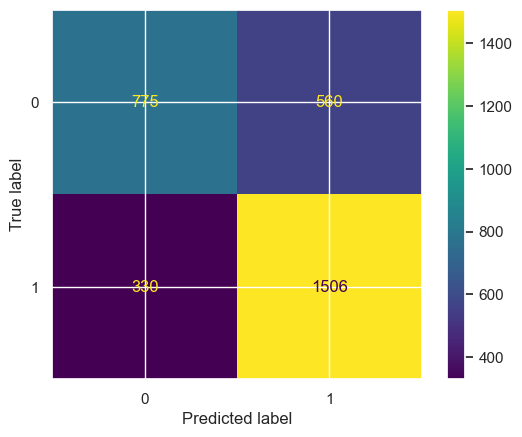

In [191]:
from sklearn.metrics import  ConfusionMatrixDisplay
d = ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred_test_gd))
d.plot()
plt.show()

<Figure size 1200x1000 with 0 Axes>

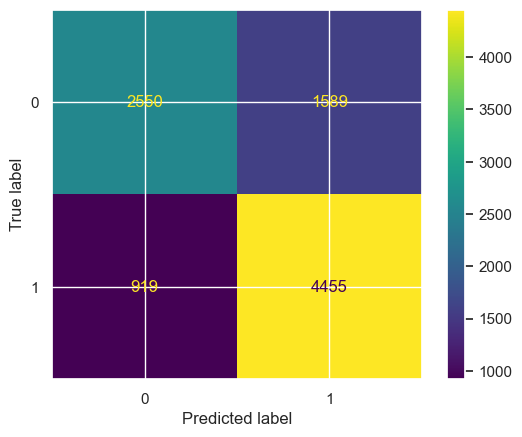

In [192]:
plt.figure(figsize =(12,10))
t = ConfusionMatrixDisplay(confusion_matrix(y_train , y_pred_train_gd))
t.plot()
plt.show()

In [193]:
from sklearn.metrics import roc_auc_score
gbm_roc_auc = roc_auc_score(y_test , y_pred_test_gd)
gbm_roc_auc

np.float64(0.7003928912388926)

In [194]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test , y_pred_test_gd)
display(fpr)
display(tpr)
display(thresholds)

array([0.        , 0.41947566, 1.        ])

array([0.        , 0.82026144, 1.        ])

array([inf,  1.,  0.])

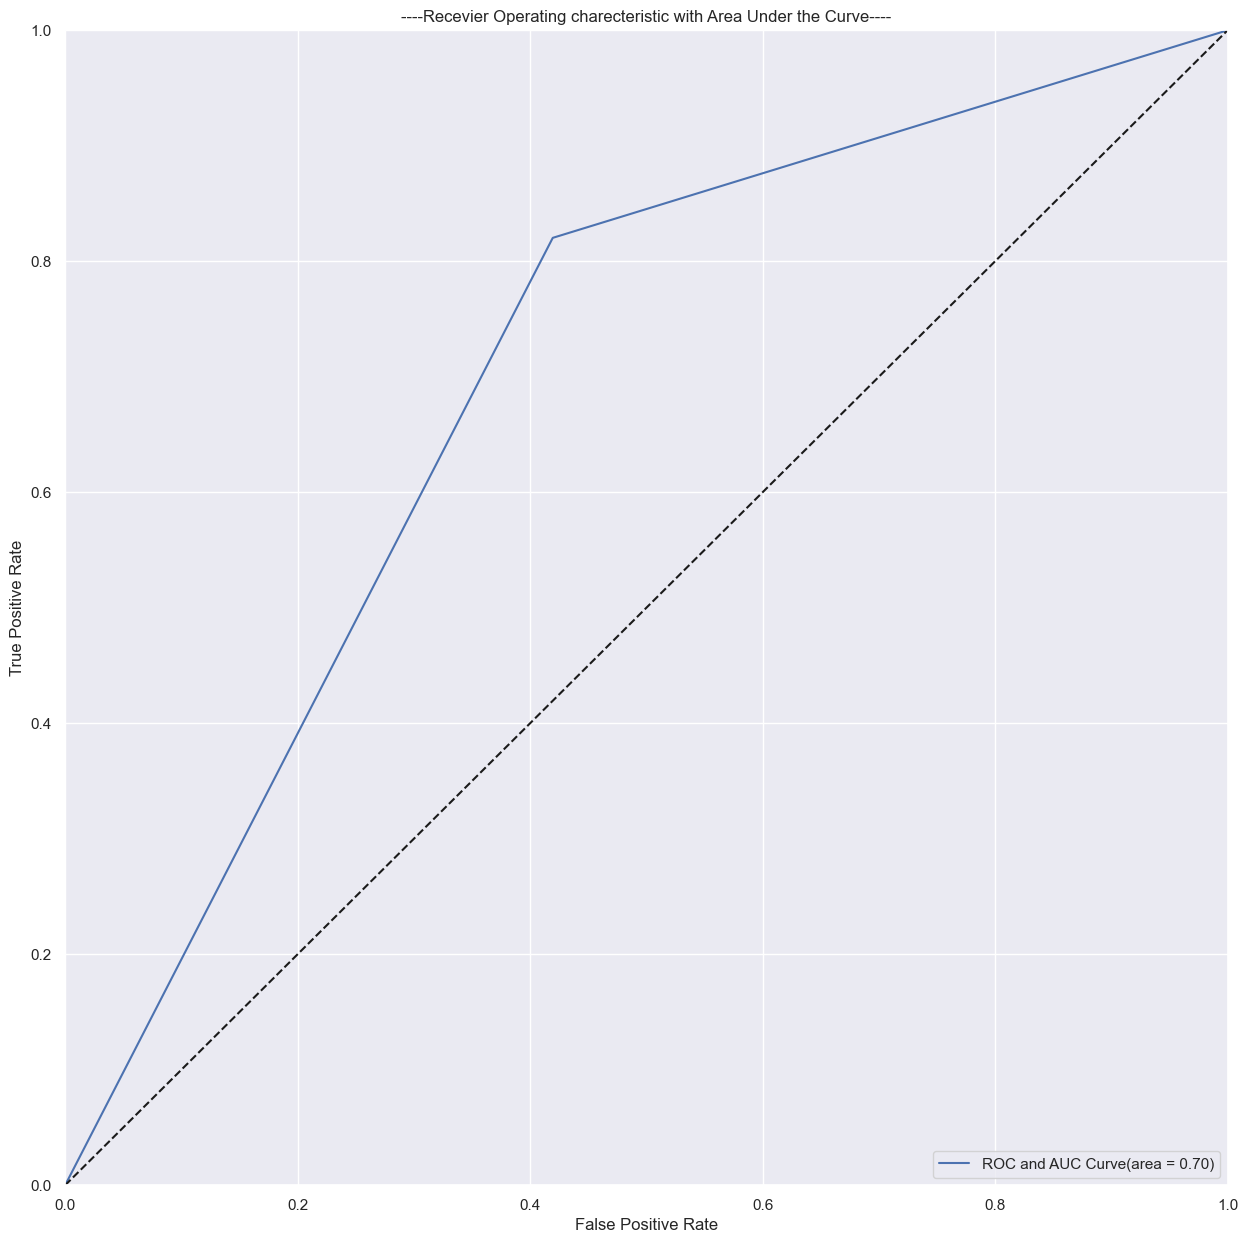

In [195]:
plt.figure(figsize = (15 , 15))
plt.plot(fpr, tpr, label = 'ROC and AUC Curve(area = %0.2f)' %gbm_roc_auc)
plt.plot([0,1] , [0,1] , 'k--')
#plotting against TPR and FPR 
#TPR range is 0 to 1 i.e 0 to 100% hence [0,1]
#similarly for FPR 
plt.xlim([0.0,1.0]) #---> 0 to 100 %
plt.ylim([0.0,1.0]) #---> 0 to 100 %
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('----Recevier Operating charecteristic with Area Under the Curve----')
plt.legend(loc = 'lower right')
plt.show()

In [196]:
test_accuracy_logit_scaled = accuracy_score(y_test , y_pred_test_lr)
train_accuracy_logit_scaled = accuracy_score(y_test , y_pred_test_lr)

In [197]:
test_accuracy_logit_unscaled = accuracy_score(y_test , y_pred_test_unscaled)
train_accuracy_logit_unscaled = accuracy_score(y_train , y_pred_train_unscaled)

In [198]:
train_accuracy_dtree = accuracy_score(y_train , y_pred_train_dtree)
test_accuracy_dtree = accuracy_score(y_test , y_pred_test_dtree)

train_accuracy_rf = accuracy_score(y_train , y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test , y_pred_test_rf)

train_accuracy_svm = accuracy_score(y_train , y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test , y_pred_test_svm)

train_accuracy_knn = accuracy_score(y_train , y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test , y_pred_test_knn)

train_accuracy_gbm = accuracy_score(y_train , y_pred_train_gd)
test_accuracy_gbm = accuracy_score(y_test , y_pred_test_gd)

train_accuracy_xgb = accuracy_score(y_train , y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test , y_pred_test_xgb)


train_accuracy_ngb = accuracy_score(y_train , y_pred_train_ngb)
test_accuracy_ngb = accuracy_score(y_test , y_pred_test_ngb)

train_accuracy_nbr = accuracy_score(y_train , y_pred_train_nbr)
test_accuracy_nbr = accuracy_score(y_test , y_pred_test_nbr)

In [199]:
list1 = ['Logit Scaled' , 'Logit Unscaled' , 'Decision Tree' , 'Random Forest' , 'Support Vector' , 'KNN' ,'Gradient boosting',
        'XG Boost' , 'Naives-Guassian' , 'Naives-Bernoulli']

list2 = [train_accuracy_logit_scaled ,train_accuracy_logit_unscaled,train_accuracy_dtree,train_accuracy_rf,train_accuracy_svm,
        train_accuracy_knn,train_accuracy_gbm,train_accuracy_xgb,train_accuracy_ngb,train_accuracy_nbr]

list3 = [test_accuracy_logit_scaled ,test_accuracy_logit_unscaled,test_accuracy_dtree,test_accuracy_rf,test_accuracy_svm,
        test_accuracy_knn,test_accuracy_gbm,test_accuracy_xgb,test_accuracy_ngb,test_accuracy_nbr]

             ML ALGO  Train Accuracy  Test Accuracy
0       Logit Scaled        0.619678       0.619678
1     Logit Unscaled        0.629770       0.617471
2      Decision Tree        0.991590       0.679912
3      Random Forest        0.991590       0.743299
4     Support Vector        0.587091       0.590035
5                KNN        0.752759       0.628193
6  Gradient boosting        0.736361       0.719331
7           XG Boost        0.919268       0.755598
8    Naives-Guassian        0.623358       0.617471
9   Naives-Bernoulli        0.629349       0.617155
Axes(0.125,0.11;0.775x0.77)


C:\Users\harsh\AppData\Local\Temp\ipykernel_15472\2325760389.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)


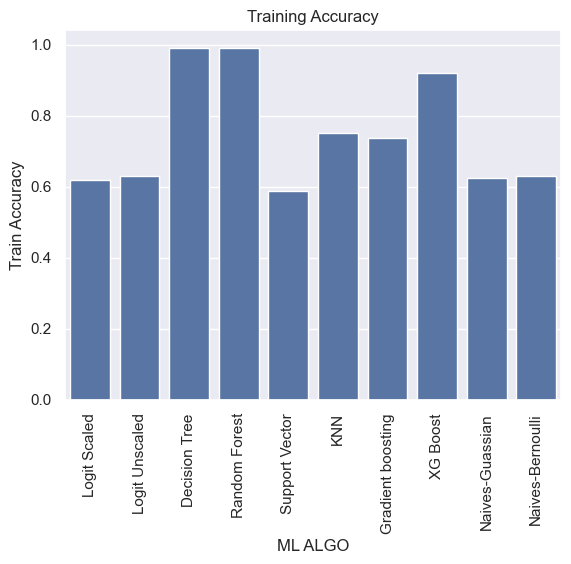

In [200]:
accuracy_df = pd.DataFrame({'ML ALGO': list1 , 'Train Accuracy' : list2 ,
                            'Test Accuracy' : list3})

print(accuracy_df)

charts = sns.barplot(x = 'ML ALGO' , y = 'Train Accuracy' , data = accuracy_df)
charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)
plt.title('Training Accuracy')
print(charts)

Axes(0.125,0.11;0.775x0.77)


C:\Users\harsh\AppData\Local\Temp\ipykernel_15472\1449024736.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)


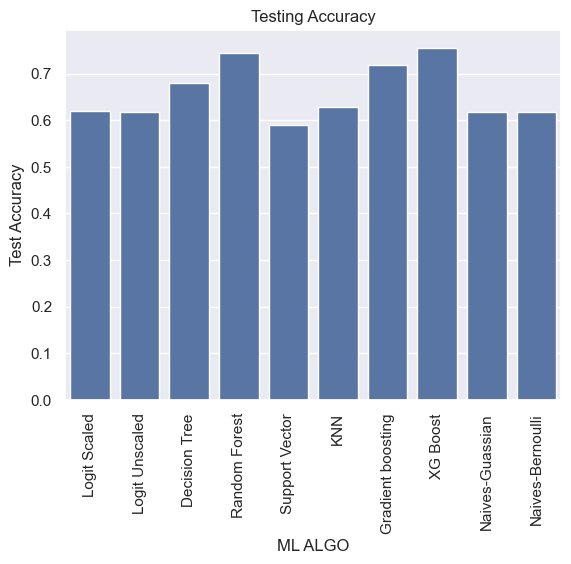

In [201]:
charts = sns.barplot(x = 'ML ALGO' , y = 'Test Accuracy' , data = accuracy_df)
charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)
plt.title('Testing Accuracy')
print(charts)

### XG Boost Classifer is giving a good result 


In [202]:
cm = confusion_matrix(y_test , y_pred_test_gd)
pd.crosstab(y_test.values.flatten(), y_pred_test_gd, rownames=['Actual'], colnames=['Predicted'], margins = True)



Predicted,0,1,All
Actual,,,
0,775,560,1335
1,330,1506,1836
All,1105,2066,3171


* Customers who did not use Coupons in actual are 1335
* Customers who did  use Coupons in actual are 1836

* Predictions 

* Precited customers who did not use coupons are 1155
* Precited customers who did  use coupons are 2016

In [203]:
lr_roc_auc = roc_auc_score(y_test , y_pred_test_lr)
dtree_roc_auc = roc_auc_score(y_test , y_pred_test_dtree)
rf_roc_auc = roc_auc_score(y_test , y_pred_test_rf)
svm_roc_auc = roc_auc_score(y_test , y_pred_test_svm)
knn_roc_auc = roc_auc_score(y_test , y_pred_test_knn)
xgb_roc_auc = roc_auc_score(y_test , y_pred_test_xgb)
ngb_roc_auc = roc_auc_score(y_test , y_pred_test_ngb)
nbr_roc_auc = roc_auc_score(y_test , y_pred_test_nbr)

In [204]:
fpr,tpr,thresholds = roc_curve(y_test , y_pred_test_gd)
fpr1,tpr1,thresholds = roc_curve(y_test , y_pred_test_lr)
fpr2,tpr2,thresholds = roc_curve(y_test , y_pred_test_dtree)
fpr3,tpr3,thresholds = roc_curve(y_test , y_pred_test_rf)
fpr4,tpr4,thresholds = roc_curve(y_test , y_pred_test_svm)
fpr5,tpr5,thresholds = roc_curve(y_test , y_pred_test_knn)
fpr6,tpr6,thresholds = roc_curve(y_test , y_pred_test_xgb)
fpr7,tpr7,thresholds = roc_curve(y_test , y_pred_test_ngb)
fpr8,tpr8,thresholds = roc_curve(y_test , y_pred_test_nbr)


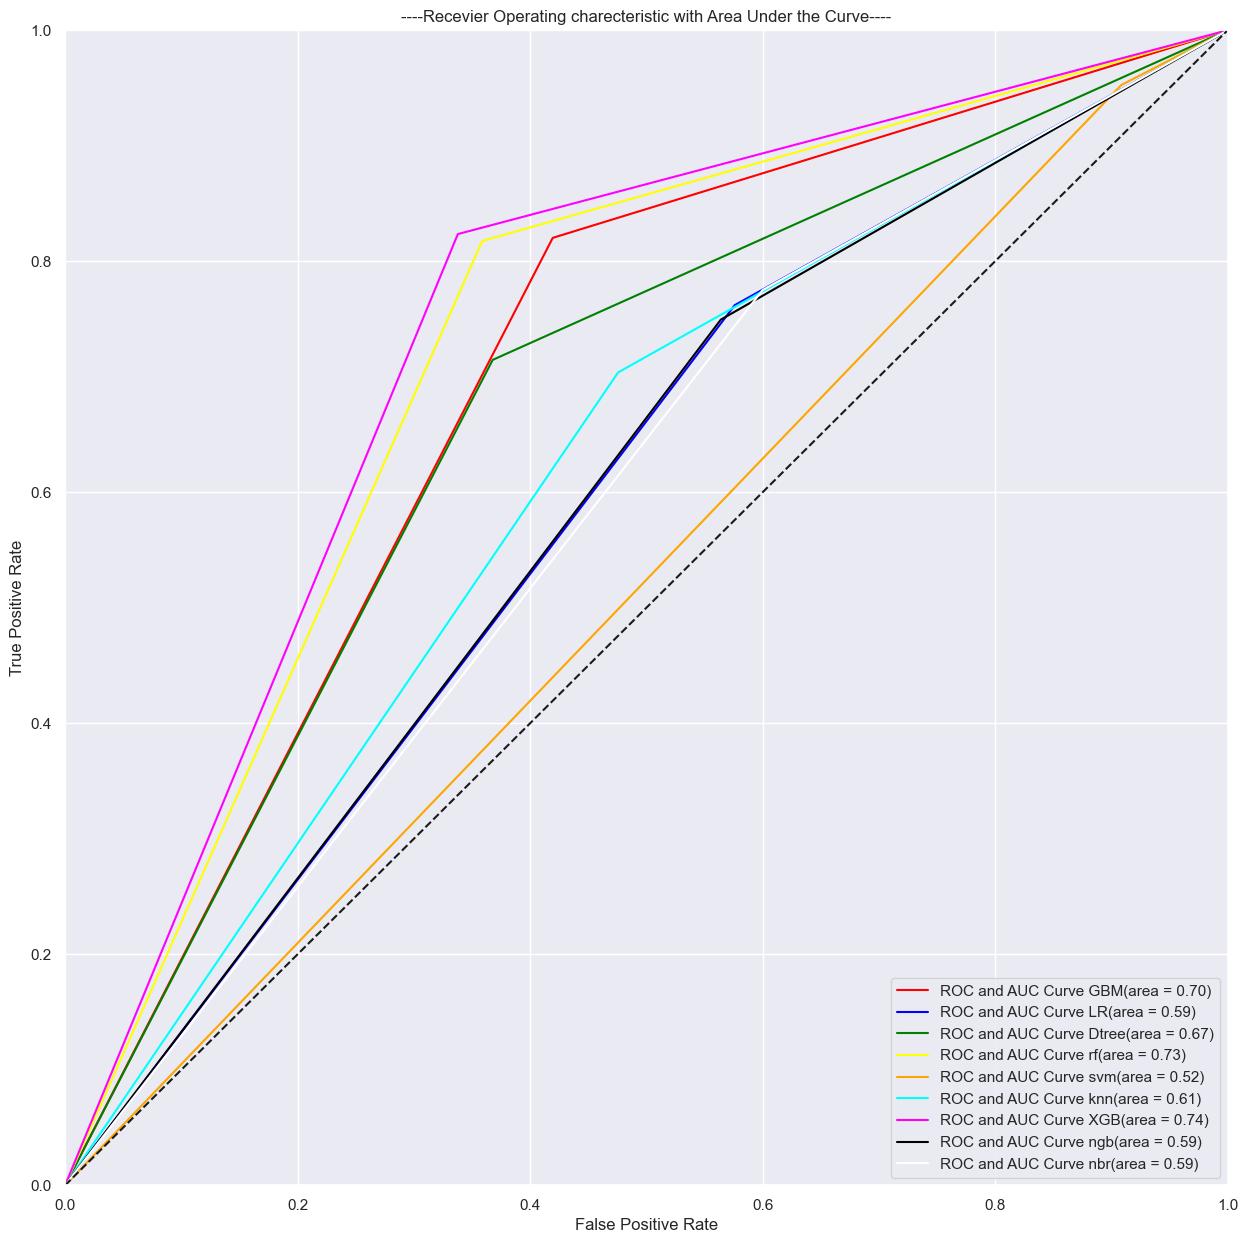

In [205]:
plt.figure(figsize = (15 , 15))
plt.plot(fpr, tpr, label = 'ROC and AUC Curve GBM(area = %0.2f)' %gbm_roc_auc,color = 'red')
plt.plot(fpr1, tpr1, label = 'ROC and AUC Curve LR(area = %0.2f)' %lr_roc_auc , color = 'blue')
plt.plot(fpr2, tpr2, label = 'ROC and AUC Curve Dtree(area = %0.2f)' %dtree_roc_auc , color = 'green')
plt.plot(fpr3, tpr3, label = 'ROC and AUC Curve rf(area = %0.2f)' %rf_roc_auc , color = 'yellow')
plt.plot(fpr4, tpr4, label = 'ROC and AUC Curve svm(area = %0.2f)' %svm_roc_auc , color = 'orange')
plt.plot(fpr5, tpr5, label = 'ROC and AUC Curve knn(area = %0.2f)' %knn_roc_auc , color = 'cyan')
plt.plot(fpr6, tpr6, label = 'ROC and AUC Curve XGB(area = %0.2f)' %xgb_roc_auc , color = 'magenta')
plt.plot(fpr7, tpr7, label = 'ROC and AUC Curve ngb(area = %0.2f)' %ngb_roc_auc , color = 'black')
plt.plot(fpr8, tpr8, label = 'ROC and AUC Curve nbr(area = %0.2f)' %nbr_roc_auc , color = 'white')
plt.plot([0,1] , [0,1] , 'k--')
#plotting against TPR and FPR 
#TPR range is 0 to 1 i.e 0 to 100% hence [0,1]
#similarly for FPR 
plt.xlim([0.0,1.0]) #---> 0 to 100 %
plt.ylim([0.0,1.0]) #---> 0 to 100 %
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('----Recevier Operating charecteristic with Area Under the Curve----')
plt.legend(loc = 'lower right')
plt.show()

In [206]:
accuracy_df.to_csv('accuracy_df.csv')

In [207]:
training_accuracy_cv_xgb = cross_val_score(xgb , x_train , y_train , cv = 10)
testing_accuracy_cv_xgb = cross_val_score(xgb , x_test , y_test , cv = 10)
print('training_accuracy', training_accuracy_cv_xgb )
print('***************')
print('testing_accuracy' ,testing_accuracy_cv_xgb )
print()
print('***************')
print()

training_accuracy [0.74684874 0.75420168 0.75105042 0.75184017 0.75920084 0.76445846
 0.74658254 0.76025237 0.74973712 0.74763407]
***************
testing_accuracy [0.69496855 0.65615142 0.74132492 0.68769716 0.73817035 0.70031546
 0.71608833 0.70662461 0.72555205 0.7192429 ]

***************



In [208]:
print('training_accuracy', training_accuracy_cv_xgb.mean() )
print('***************')
print('testing_accuracy' ,testing_accuracy_cv_xgb.mean()) 

training_accuracy 0.7531806413417101
***************
testing_accuracy 0.7086135745888141


In [209]:
print('training accu xgb :' , accuracy_score(y_train , y_pred_train_xgb))
print('testing accu xgb :' , accuracy_score(y_test , y_pred_test_xgb))

training accu xgb : 0.9192683695994954
testing accu xgb : 0.7555976032797225


In [210]:
training_accuracy_cv_rf = cross_val_score(rf , x_train , y_train , cv = 10)
testing_accuracy_cv_rf = cross_val_score(rf , x_test , y_test , cv = 10)
print('training_accuracy', training_accuracy_cv_rf )
print('***************')
print('testing_accuracy' ,testing_accuracy_cv_rf )
print()
print('***************')
print()

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConvers

training_accuracy [0.73739496 0.73004202 0.72794118 0.75499474 0.75078864 0.76025237
 0.73711882 0.73396425 0.74132492 0.74132492]
***************
testing_accuracy [0.67924528 0.64984227 0.76656151 0.7318612  0.72239748 0.69716088
 0.70977918 0.69716088 0.69400631 0.74763407]

***************



In [211]:
print('training_accuracy', training_accuracy_cv_rf.mean() )
print('***************')
print('testing_accuracy' ,testing_accuracy_cv_rf.mean())

training_accuracy 0.7415146815824121
***************
testing_accuracy 0.7095649068507827
